# SLEEP DATA PROJECT

                                                                                                  - Abhishek Hosamath

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta, date, time
import matplotlib
import warnings

In [2]:
sleepdata=pd.read_csv("Health_Data/sleep.csv")
exercise=pd.read_csv("Health_Data/exercise.csv")
heartrate=pd.read_csv("Health_Data/heart_rate.csv")
floorsclimbed=pd.read_csv("Health_Data/floors_climbed.csv")
stepcount=pd.read_csv("Health_Data/step_count.csv")
summary_main=pd.read_csv("Health_Data/summary.csv")

## Exercise Data Set

### Overview of dataset

We will first make basic observations of the dataset to get a feel of the dataset. We will use .head(), .shape, .dtypes, .describe() and .columns to do the same.

The same format has been followed across all the datasets in the project.

In [138]:
exercise.head()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,location_data,datauuid,create_time
0,0,2018-04-07 21:40:40.673,NaN,NaN,2018-04-07 21:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.61,009c4899-f8fb-c887-294a-045dcce7c880.location_...,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 21:41:42.416
1,1,2018-01-27 15:08:00.000,NaN,NaN,2018-01-27 14:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,30004.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 15:08:40.225
2,2,2018-09-04 01:35:14.221,NaN,NaN,2018-09-04 01:23:23.355,NaN,NaN,NaN,710866,F/D7+hL5E5,...,NaN,019f38b0-adea-a157-dd7d-07af53a3ad0b.live_data...,NaN,NaN,NaN,NaN,997.50,019f38b0-adea-a157-dd7d-07af53a3ad0b.location_...,019f38b0-adea-a157-dd7d-07af53a3ad0b,2018-09-04 01:36:15.337
3,3,2018-09-12 01:33:53.262,NaN,NaN,2018-09-12 01:21:34.461,NaN,NaN,NaN,738801,F/D7+hL5E5,...,NaN,01d238fd-1111-a35d-ee11-1859abc1c8a9.live_data...,NaN,NaN,NaN,NaN,780.37,01d238fd-1111-a35d-ee11-1859abc1c8a9.location_...,01d238fd-1111-a35d-ee11-1859abc1c8a9,2018-09-12 01:34:54.418
4,4,2018-05-01 22:12:20.915,NaN,NaN,2018-05-01 22:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,...,NaN,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,NaN,NaN,NaN,NaN,765.12,020502c3-3cc7-8d33-f7bc-2d8e27609a47.location_...,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 22:13:21.374


In [139]:
exercise.shape

(876, 40)

In [140]:
exercise.dtypes

Unnamed: 0                 int64
end_time                  object
altitude_loss            float64
max_altitude             float64
start_time                object
count                    float64
altitude_gain            float64
exercise_custom_type     float64
duration                   int64
deviceuuid                object
max_heart_rate           float64
max_rpm                  float64
mean_heart_rate          float64
pkg_name                  object
max_cadence              float64
time_offset               object
mean_caloricburn_rate    float64
incline_distance         float64
exercise_type              int64
decline_distance         float64
max_speed                float64
mean_power               float64
max_power                float64
mean_rpm                 float64
calorie                  float64
mean_cadence             float64
mean_speed               float64
update_time               object
min_altitude             float64
min_heart_rate           float64
count_type

In [141]:
exercise.describe()

,Unnamed: 0,altitude_loss,max_altitude,count,altitude_gain,exercise_custom_type,duration,max_heart_rate,max_rpm,mean_heart_rate,...,calorie,mean_cadence,mean_speed,min_altitude,min_heart_rate,count_type,max_caloricburn_rate,custom,additional,distance
count,876.000000,8.000000,24.000000,87.000000,8.000000,0.0,8.760000e+02,555.000000,0.0,555.000000,...,876.000000,556.000000,846.000000,24.000000,555.000000,87.000000,0.0,0.0,0.0,846.000000
mean,437.500000,37.442822,113.998068,81.666667,60.679986,NaN,1.329278e+06,36.962162,NaN,27.302703,...,120.618175,4.333448,1.093702,72.133147,17.403604,30003.862069,NaN,NaN,NaN,1081.648883
std,253.023714,34.096352,131.798000,555.645271,50.656445,NaN,9.717094e+05,72.833253,NaN,53.552180,...,112.026446,23.864091,0.739982,122.681767,34.317734,0.631948,NaN,NaN,NaN,2085.280124
min,0.000000,0.000000,-112.719000,0.000000,1.343596,NaN,8.011000e+03,0.000000,NaN,0.000000,...,0.179114,0.000000,0.000000,-138.124000,0.000000,30001.000000,NaN,NaN,NaN,0.000000
25%,218.750000,16.938517,36.837250,0.000000,38.801126,NaN,7.226580e+05,0.000000,NaN,0.000000,...,52.752500,0.000000,1.103047,6.682750,0.000000,30004.000000,NaN,NaN,NaN,700.719750
50%,437.500000,27.158355,72.910500,0.000000,57.258380,NaN,8.967615e+05,0.000000,NaN,0.000000,...,66.520000,0.000000,1.278166,48.343042,0.000000,30004.000000,NaN,NaN,NaN,912.890000
75%,656.250000,59.375663,167.491095,0.000000,67.501358,NaN,1.763503e+06,0.000000,NaN,0.000000,...,146.064500,0.000000,1.398836,137.628785,0.000000,30004.000000,NaN,NaN,NaN,1135.872500
max,875.000000,100.594310,525.210100,4525.000000,169.573210,NaN,8.271533e+06,220.000000,NaN,181.000000,...,1298.187000,159.554930,10.714286,342.523250,116.000000,30004.000000,NaN,NaN,NaN,46331.586000


In [142]:
exercise.columns

Index(['Unnamed: 0', 'end_time', 'altitude_loss', 'max_altitude', 'start_time',
       'count', 'altitude_gain', 'exercise_custom_type', 'duration',
       'deviceuuid', 'max_heart_rate', 'max_rpm', 'mean_heart_rate',
       'pkg_name', 'max_cadence', 'time_offset', 'mean_caloricburn_rate',
       'incline_distance', 'exercise_type', 'decline_distance', 'max_speed',
       'mean_power', 'max_power', 'mean_rpm', 'calorie', 'mean_cadence',
       'mean_speed', 'update_time', 'min_altitude', 'min_heart_rate',
       'count_type', 'live_data', 'max_caloricburn_rate', 'custom', 'comment',
       'additional', 'distance', 'location_data', 'datauuid', 'create_time'],
      dtype='object')

### Cleaning the dataset

In order to make clear observations, we will clean the dataset by:
- Removing columns with large number of missing values.
- Replacing null values with 0 or mean value of the column if required.
- Creating new columns to make further observations.
- Sorting & Rearranging the columns.

In [143]:
exercise.isnull().sum()

Unnamed: 0                 0
end_time                   0
altitude_loss            868
max_altitude             852
start_time                 0
count                    789
altitude_gain            868
exercise_custom_type     876
duration                   0
deviceuuid                 0
max_heart_rate           321
max_rpm                  876
mean_heart_rate          321
pkg_name                   0
max_cadence              320
time_offset                0
mean_caloricburn_rate    876
incline_distance         751
exercise_type              0
decline_distance         751
max_speed                213
mean_power               876
max_power                876
mean_rpm                 876
calorie                    0
mean_cadence             320
mean_speed                30
update_time                0
min_altitude             852
min_heart_rate           321
count_type               789
live_data                 83
max_caloricburn_rate     876
custom                   876
comment       

In [144]:
#Dropping columns that have large number of null values
nexercise=exercise.drop(columns=['Unnamed: 0', 'altitude_loss', 'max_altitude', 'count', 'altitude_gain','exercise_custom_type', 'max_rpm', 'max_caloricburn_rate', 'mean_caloricburn_rate', 'mean_power', 'max_power', 'mean_rpm', 'min_altitude', 'count_type', 'custom', 'comment',
       'additional','max_rpm', 'incline_distance', 'decline_distance', 'max_cadence', 'mean_cadence', 'min_heart_rate','mean_heart_rate', 'max_heart_rate'])

nexercise.isnull().sum()

end_time           0
start_time         0
duration           0
deviceuuid         0
pkg_name           0
time_offset        0
exercise_type      0
max_speed        213
calorie            0
mean_speed        30
update_time        0
live_data         83
distance          30
location_data    167
datauuid           0
create_time        0
dtype: int64

In [145]:
nexercise.columns

Index(['end_time', 'start_time', 'duration', 'deviceuuid', 'pkg_name',
       'time_offset', 'exercise_type', 'max_speed', 'calorie', 'mean_speed',
       'update_time', 'live_data', 'distance', 'location_data', 'datauuid',
       'create_time'],
      dtype='object')

In [146]:
#rearranging columns
nexercise = nexercise[['start_time', 'end_time', 'duration', 'deviceuuid', 'location_data','pkg_name', 'time_offset', 'exercise_type', 'max_speed', 'mean_speed', 'calorie', 'update_time', 'live_data', 'distance', 'datauuid', 'create_time']]

In [147]:
nexercise.head()

,start_time,end_time,duration,deviceuuid,location_data,pkg_name,time_offset,exercise_type,max_speed,mean_speed,calorie,update_time,live_data,distance,datauuid,create_time
0,2018-04-07 21:26:10.149,2018-04-07 21:40:40.673,870524,F/D7+hL5E5,009c4899-f8fb-c887-294a-045dcce7c880.location_...,com.sec.android.app.shealth,UTC-0400,1001,1.588526,1.257754,58.42,2018-04-07 21:41:42.416,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,1008.61,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 21:41:42.416
1,2018-01-27 14:38:00.000,2018-01-27 15:08:00.000,1800000,jQfnryI8/B,NaN,com.sec.android.app.shealth,UTC-0500,14001,NaN,0.000000,252.00,2018-01-27 15:09:23.176,NaN,0.00,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 15:08:40.225
2,2018-09-04 01:23:23.355,2018-09-04 01:35:14.221,710866,F/D7+hL5E5,019f38b0-adea-a157-dd7d-07af53a3ad0b.location_...,com.sec.android.app.shealth,UTC-0400,1001,1.500000,1.395675,55.49,2018-09-04 01:36:15.337,019f38b0-adea-a157-dd7d-07af53a3ad0b.live_data...,997.50,019f38b0-adea-a157-dd7d-07af53a3ad0b,2018-09-04 01:36:15.337
3,2018-09-12 01:21:34.461,2018-09-12 01:33:53.262,738801,F/D7+hL5E5,01d238fd-1111-a35d-ee11-1859abc1c8a9.location_...,com.sec.android.app.shealth,UTC-0400,1001,1.416667,1.258918,44.96,2018-09-12 01:34:54.418,01d238fd-1111-a35d-ee11-1859abc1c8a9.live_data...,780.37,01d238fd-1111-a35d-ee11-1859abc1c8a9,2018-09-12 01:34:54.418
4,2018-05-01 22:01:24.059,2018-05-01 22:12:20.915,656856,F/D7+hL5E5,020502c3-3cc7-8d33-f7bc-2d8e27609a47.location_...,com.sec.android.app.shealth,UTC-0400,1001,1.571783,1.323111,43.85,2018-05-01 22:13:21.374,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,765.12,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 22:13:21.374


In [148]:
#Convert start_time, end_time, update_time and create_time to datetime values
nexercise["start_time"]=pd.to_datetime(nexercise["start_time"])
nexercise["end_time"]=pd.to_datetime(nexercise["end_time"])
nexercise["create_time"]=pd.to_datetime(nexercise["create_time"])
nexercise["update_time"]=pd.to_datetime(nexercise["update_time"])

In [149]:
#Duration is in millisecconds - converting it to minutes by dividing it by 60000
nexercise['duration']=round(nexercise['duration']/60000,2)

In [150]:
#Checking for the differnt time offset value
nexercise.time_offset.unique()

array(['UTC-0400', 'UTC-0500', 'UTC-0800', 'UTC+0200', 'UTC-0700'],
      dtype=object)

In [151]:
#sorting values as per nstarttime
nexercise.sort_values("start_time", axis=0, inplace=True)
nexercise.reset_index(drop=True, inplace=True)

The above UTC time zones show that records from five different time zones with day light savings as observed in the dataset.

In [152]:
#Adding days of the week column to the dataframe
dayofweek=pd.DataFrame()
daylist=[]
for i in nexercise['start_time']:
    daylist.append(i.strftime("%a"))
dayofweek=dayofweek.append(daylist)
nexercise["day"]=dayofweek

In [153]:
#From the samsung health docs, adding exercise type corresponding to different exercise codes.
nexercise['exercise_type'].replace([0,1001,1002,11007,13001,14001,15006],['Custom', 'Walking', 'Running', 'Cycling', 'Hiking', 'Swimming', 'Elliptical trainer'], inplace=True )

### Calorie vs Distance & Calorie vs Duration

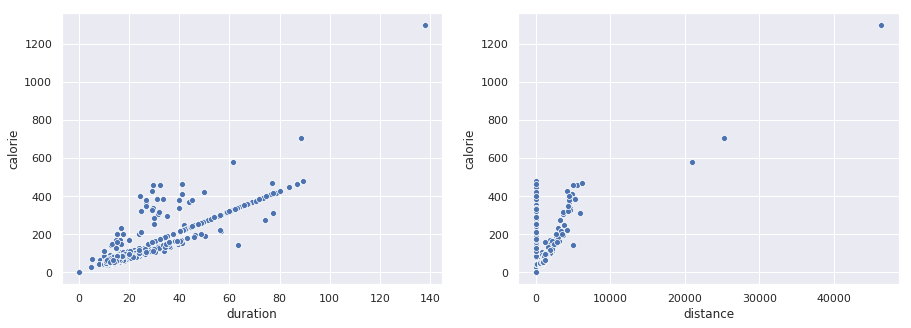

In [154]:
sns.set(style='darkgrid')
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x=nexercise['duration'], y=nexercise['calorie'])
plt.subplot(122)
sns.scatterplot(x=nexercise['distance'],y=nexercise['calorie'])

- There is a clear relationship between duration of exercise and calorie expenditure - however, some exercices have large calorie expenditure for short durations - this is due to the nature of exercise which can be low or high in intensity.
- As distance increases, so does the amount of calories burnt. All exercises do not have a distance component as they can be performed in a single location (eg: weight training or aerobics).

### Group by type of exercise
Let us groupby exercise_type to further explore.

In [20]:
gbyexercise=nexercise.groupby(['exercise_type']).mean()
gbyexercise

,duration,max_speed,mean_speed,calorie,distance
exercise_type,,,,,
Custom,47.731913,NaN,0.000000,254.508904,0.000000
Cycling,30.517143,12.440967,3.518013,275.311048,12215.648000
Elliptical trainer,8.690000,NaN,NaN,60.836000,NaN
Hiking,16.610000,1.684247,0.920603,105.000000,910.000000
Running,24.370909,3.597376,2.317744,299.291051,3652.893273
Swimming,30.298701,NaN,0.000000,254.493506,0.000000
Walking,16.248592,1.863709,1.322718,69.272654,1151.918809


We can see from the above that there are certain exercise types that have less duration but very high calorie expenditures.
 - Running is a high intensity exercise and has the highest calorie expendtiture with less duration. The same is true of Cycling.
 - Exercise 0 (custom exercise) has the maximum duration with relatively less calorie expenditure suggesting it is a low intensity exercise.
 - Custome exercise, Swimming and Elliptical trainer dont have speed and distance values - as these activities were done in the same location, whereas the others were recorded from a device like GPS.

We will now plot the calorie spent per minute of each exercise below.

Text(0, 0.5, 'Calories per minute')

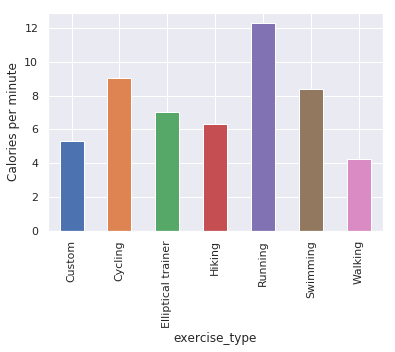

In [21]:
gbyexercise['calorie per minute']=gbyexercise['calorie']/gbyexercise['duration']
gbyexercise['calorie per minute'].plot(kind='bar')
plt.ylabel('Calories per minute')

### Frequency of the type of exercises performed

Text(0, 0.5, 'Number of times performed')

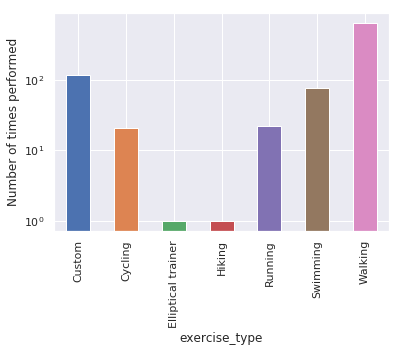

In [22]:
gexcount=nexercise.groupby(['exercise_type']).count()['start_time']
gexcount.plot(kind='bar', logy=True)
plt.ylabel("Number of times performed")

We can see that the most preferred exercise is walking - however, many times walking may not be performed as an exercise and the tracker may consider small walks involved in daily life as exercise. We will adjust for this by removing all short walks and replot the above graph to see if there were any changes.

Text(0.5, 0, 'Walk Duration (min)')

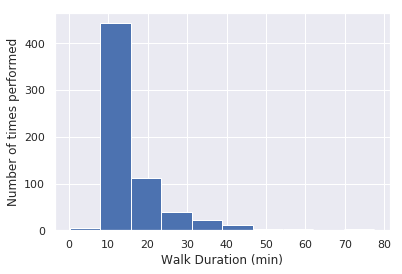

In [26]:
plt.hist(nexercise[nexercise['exercise_type']=='Walking']['duration'])
plt.ylabel("Number of times performed")
plt.xlabel("Walk Duration (min)")

From the above we can see that there were too many short walks. Therefore, we will consider that walks greater than 25 minutes will only qualify as exercise.

#### Removing Walks lesser than 25 minutes

In [27]:
walks=nexercise[(nexercise['exercise_type']=='Walking') & (nexercise['duration']<25)]
cond=nexercise['start_time'].isin(walks['start_time'])==True
newexercise=nexercise.drop(nexercise[cond].index)

Text(0, 0.5, 'Number of times performed')

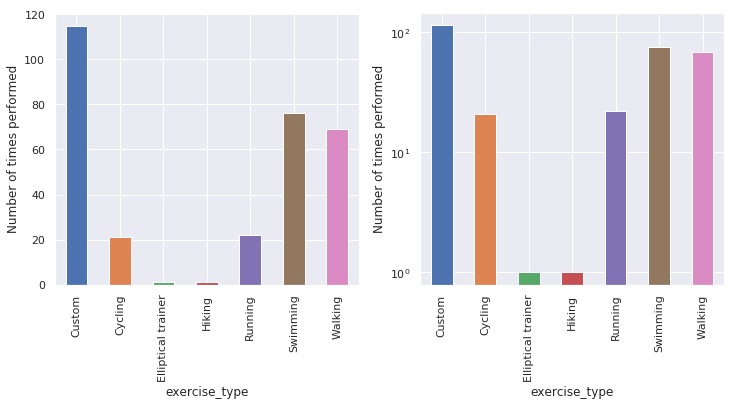

In [28]:
gexcount=newexercise.groupby(['exercise_type']).count()['start_time']
plt.subplots(figsize=(12,5))
plt.subplot(121)
gexcount.plot(kind='bar')
plt.ylabel("Number of times performed")
plt.subplot(122)
gexcount.plot(kind='bar', logy=True)
plt.ylabel("Number of times performed")

We now get a clearer picture of the exercises perofrmed.

- Custom, Swimming and walking are the most preferred type of exercises. 
- They are followed by running and cycling.
- All the other exercises rarely, performed. 

We will now plot them by timezones to check if we can make some observations.

Text(0.5, 1.0, 'Count of exercises at different time zones')

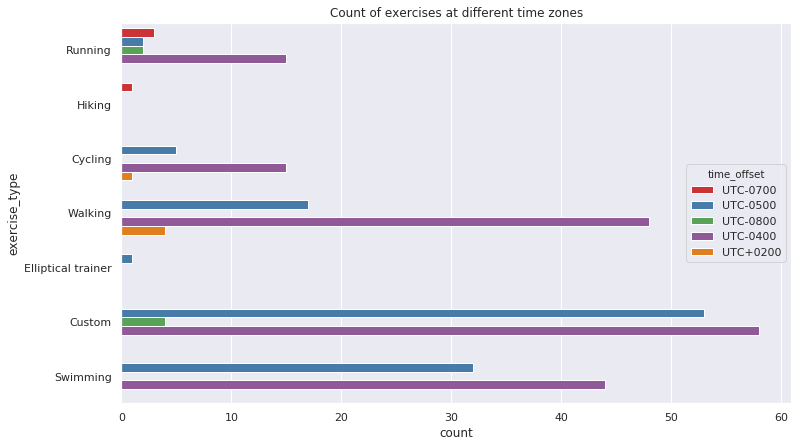

In [30]:
sns.set(style="darkgrid")
plt.subplots(figsize=(12,7))
ax1=sns.countplot(y=newexercise['exercise_type'], hue=newexercise["time_offset"], palette="Set1")
ax1.set_title("Count of exercises at different time zones")

Observations:
- The individual has spent majority of his/her time exercising in the UTC-4/-5 zone (and -4 values are more than -5) - this is most likely where the person lives full time - home loaction. Low frequency of all exercises at other locations prove the same - the other locations have probably been recorded when the person is travelling to another location.

- -4/-5 and -7/-8 are the same time zones and can be considered as summer/winter months. We see more frequency of exercises in summer time zones.

- Running, hiking, cycling, custom and walking are performed more when not at home. 

### Grouping by day of the week

Text(0, 0.5, 'Distance')

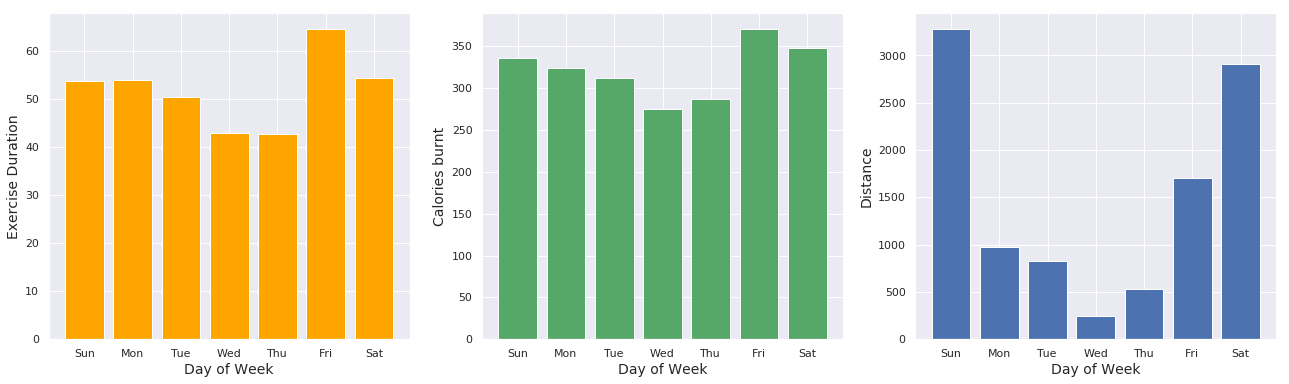

In [31]:
gexbyday=newexercise.groupby([nexercise.start_time.dt.date, "day"]).sum()
gexbyday.reset_index(inplace=True)
gexbyday=gexbyday.groupby('day').mean()
day_order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
gexbyday=gexbyday.reindex(index=day_order)

f=plt.figure(figsize=(22,6))

ax=plt.subplot(131)
plt.bar(gexbyday.index, gexbyday['duration'], color="orange")
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Exercise Duration', fontsize=14)

ax2=plt.subplot(132)
plt.bar(gexbyday.index, gexbyday['calorie'], color="g")
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories burnt', fontsize=14)

ax3=plt.subplot(133)
plt.bar(gexbyday.index, gexbyday['distance'])
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Distance', fontsize=14)

Observations:
 - Average exercise duration is maximum on Fridays and minimum mid week - all other days see a duration of 45~55 min. Calories burned are proportional to the exercise duration. 
 
 - Distance covered is maximum again on Fridays
 
 - The least amount of exercise duration, calories burnt are recorded on Tuesdays and Thursdays.
 
 - Distance and calories / exercise are not proportion - this is due to the nature of the exercise being performed (eg: cycling covers more distance when compared to running, but burns fewer calories for the same distance covered) and due to the fact that some exercises dont have a distance component.

[Text(0, 0.5, 'Start Hour')]

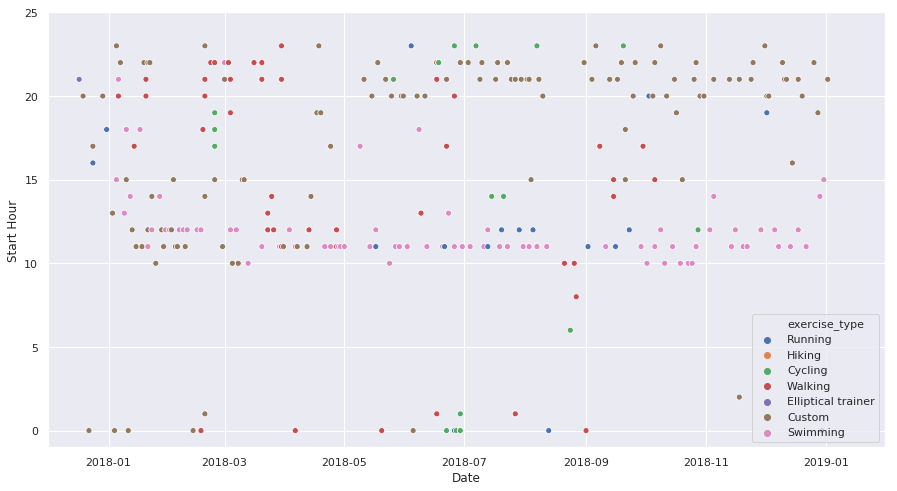

In [35]:
sns.set(style="darkgrid")
palette1 = sns.color_palette("mako_r", 7)
f, axes=plt.subplots(1,1, figsize=(15,8))
p=sns.scatterplot(x=newexercise.start_time.dt.date, y=newexercise.start_time.dt.hour, hue=newexercise.exercise_type)
p.set(xlim = ('2017-12-01', '2019-01-31'))
p.set(ylim=(-1, 25))
p.set(xlabel=('Date'))
p.set(ylabel=('Start Hour'))

We can see some patterns for exercise times:
- Exercise happens at 10-12 AM range or 8-12 PM range
- Swimming is performed mostly at around 8-12 AM
- Custom is mostly performed at 8-10 PM range, but does have few entries in the morning.
- Cycling is also performed at mostly perfomred in the later part of the day 
- Walking, Running, Hiking and Elliptical dont really have a fixed pattern.

### Exercise History

[Text(0, 0.5, 'Duration (min)')]

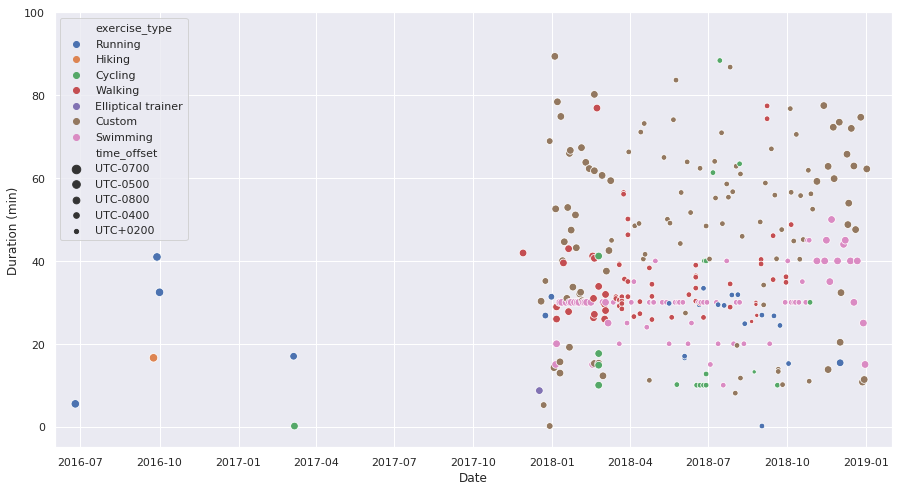

In [36]:
#p.set(xlim = ('2017-11-01', '2019-03-02'))
sns.set(style="darkgrid")
palette1 = sns.color_palette("mako_r", 7)
f, axes=plt.subplots(1,1, figsize=(15,8))
#sns.lineplot(x=nexercise.start_time.dt.date, y=nexercise.duration, hue=nexercise.exercise_type, linewidth=1, palette=palette1,  markers=True, dashes=False)
p=sns.scatterplot(x=newexercise.start_time.dt.date, y=newexercise.duration, hue=newexercise.exercise_type, size=newexercise.time_offset)
p.set(xlim = ('2016-06-01', '2019-01-31'))
p.set(ylim=(-5, 100))
p.set(xlabel=('Date'))
p.set(ylabel=('Duration (min)'))

The plot above actually gives us a lot of insights about this person. From the plot, we can see that a big change occurs around December 2017 - Either there is inconsistency in data from June 2016 - December 2018, or there is radical change in the above person's lifestyle - from casual, running and hiking, this person becomes very active.

### Overall observations
- The individual performs a wide variety of exercises and spends about 45-50 min everyday on exercise.
- Due to the inconsistency in data, we will get a complete picture only once we make a comaprison of this dataset with the summary dataset
Overall, we can say that this person is presently quite active, due to the nature of activities and duration of exercises performed, and is most likely in good shape.

## Heartrate Data Set

### Overview of dataset

In [3]:
heartrate.head()

,Unnamed: 0,end_time,heart_rate,binning_data,start_time,heart_beat_count,update_time,deviceuuid,max,min,pkg_name,time_offset,custom,comment,datauuid,create_time
0,0,2018-12-12 09:30:29.257,57.0,NaN,2018-12-12 09:30:29.257,1,2018-12-12 09:35:00.239,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0500,NaN,NaN,0002f020-959a-8d57-4380-35d995bc7b86,2018-12-12 09:35:00.239
1,1,2018-10-23 18:00:29.301,60.0,NaN,2018-10-23 18:00:29.301,1,2018-10-23 18:15:00.330,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,000334b3-bf4c-f59e-f710-a9f4d4a748a0,2018-10-23 18:15:00.330
2,2,2018-07-22 06:10:29.318,66.0,NaN,2018-07-22 06:10:29.318,1,2018-07-22 06:15:00.249,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,00066e92-c981-df35-819d-8b2e230bc3d4,2018-07-22 06:15:00.249
3,3,2018-10-08 02:00:29.324,69.0,NaN,2018-10-08 02:00:29.324,1,2018-10-08 02:13:22.101,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,0007c0e9-1f83-749e-5b46-1a09ff73be3e,2018-10-08 02:13:22.101
4,4,2018-08-29 06:30:29.290,58.0,NaN,2018-08-29 06:30:29.290,1,2018-08-29 06:35:00.241,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,000caa8c-6ccf-44ca-4f4a-95b77c3433e8,2018-08-29 06:35:00.241


In [4]:
heartrate.shape

(15726, 16)

In [5]:
heartrate.describe()

,Unnamed: 0,heart_rate,heart_beat_count,max,min,custom,comment
count,15726.000000,15726.000000,15726.000000,15709.000000,15709.000000,0.0,0.0
mean,7862.500000,60.704375,0.992497,0.581386,0.578013,NaN,NaN
std,4539.849502,8.742298,0.086300,6.241904,6.206199,NaN,NaN
min,0.000000,41.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,3931.250000,55.000000,1.000000,0.000000,0.000000,NaN,NaN
50%,7862.500000,59.000000,1.000000,0.000000,0.000000,NaN,NaN
75%,11793.750000,65.000000,1.000000,0.000000,0.000000,NaN,NaN
max,15725.000000,177.000000,1.000000,118.000000,118.000000,NaN,NaN


In [6]:
heartrate.dtypes

Unnamed: 0            int64
end_time             object
heart_rate          float64
binning_data         object
start_time           object
heart_beat_count      int64
update_time          object
deviceuuid           object
max                 float64
min                 float64
pkg_name             object
time_offset          object
custom              float64
comment             float64
datauuid             object
create_time          object
dtype: object

### Cleaning the dataset

In [175]:
heartrate.isnull().sum()

Unnamed: 0              0
end_time                0
heart_rate              0
binning_data        15688
start_time              0
heart_beat_count        0
update_time             0
deviceuuid              0
max                    17
min                    17
pkg_name                0
time_offset             0
custom              15726
comment             15726
datauuid                0
create_time             0
dtype: int64

We will clean the dataset by removing columns with missing values so that we can make clear observations.

In [176]:
#Dropping columns with missing values
nheartrate=heartrate.drop(columns=['Unnamed: 0', 'binning_data', 'max', 'min', 'custom', 'comment'])
#Rearranging the columns
nheartrate=nheartrate[['start_time', 'end_time', 'time_offset', 'heart_rate', 'heart_beat_count', 'create_time', 'update_time', 'pkg_name', 'datauuid', 'deviceuuid']]

In [177]:
#Convert start_time, end_time, update_time and create_time to datetime values
nheartrate["start_time"]=pd.to_datetime(nheartrate["start_time"])
nheartrate["end_time"]=pd.to_datetime(heartrate["end_time"])
nheartrate["create_time"]=pd.to_datetime(nheartrate["create_time"])
nheartrate["update_time"]=pd.to_datetime(nheartrate["update_time"])

Similar to the previous data set, we will correct the datetime values and add the day of the week column.

In [178]:
nheartrate.time_offset.unique()

array(['UTC-0500', 'UTC-0400', 'UTC+0200', 'UTC-0800', 'UTC-0700',
       'UTC+0430'], dtype=object)

In [179]:
#sorting values as per nstarttime
nheartrate.sort_values("start_time", axis=0, inplace=True)
nheartrate.reset_index(drop=True, inplace=True)

In [180]:
#Adding days of the week column to the dataframe
dayofweek=pd.DataFrame()
daylist=[]
for i in nheartrate['start_time']:
    daylist.append(i.strftime("%a"))
dayofweek=dayofweek.append(daylist)
nheartrate["day"]=dayofweek

There is mistake in dates in the first and second rows of the 'start_time' and 'end_time'. Since the create and update times are the same as 'start_time' and 'end_time' in most columns, we will change the dates and time values to match those records (the values will be approximately the same in this case.)

In [181]:
warnings.filterwarnings('ignore')

nheartrate['start_time'][0]=nheartrate['create_time'][0]
nheartrate['start_time'][1]=nheartrate['create_time'][1]

nheartrate['end_time'][0]=nheartrate['create_time'][0]
nheartrate['end_time'][1]=nheartrate['create_time'][1]

In [182]:
#sort again after changing the values above
nheartrate.sort_values("start_time", axis=0, inplace=True)
nheartrate.reset_index(drop=True, inplace=True)

From the cleaned dataset, we can see that the heart rate table just contains values of heart rate recorded at a particular instance during a day.

### Heartrate distribution across the dataset

Text(0.5, 1.0, 'Heart rate recorded for the entire data set')

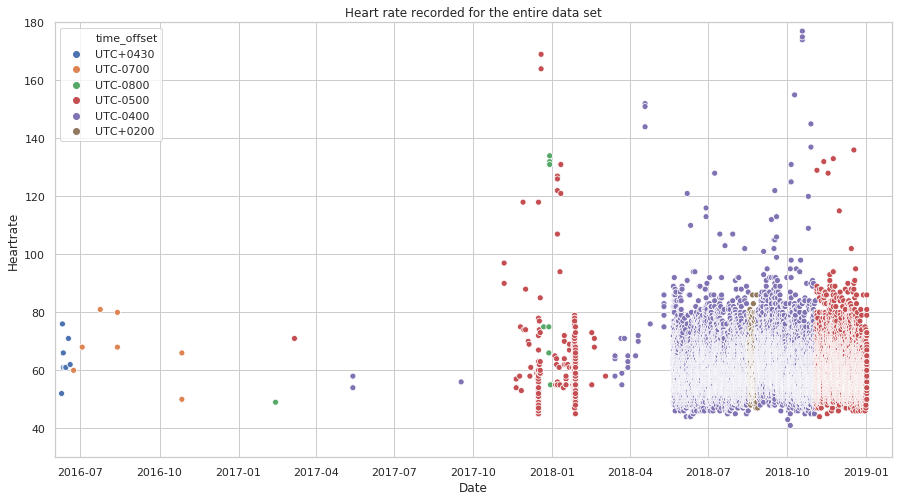

In [15]:
sns.set(style="whitegrid")
f,axes=plt.subplots(1,1, figsize=(15,8))
p=sns.scatterplot(x=nheartrate.start_time.dt.date, y=nheartrate.heart_rate, hue=nheartrate.time_offset)
p.set(xlim = ('2016-06-01', '2019-01-31'))
p.set(ylim=(30, 180))
plt.xlabel("Date")
plt.ylabel("Heartrate")
plt.title("Heart rate recorded for the entire data set")

Just to get another perspective, we will plot the averages of above data.

In [16]:
gheart=nheartrate.groupby([nheartrate.start_time.dt.date, nheartrate.time_offset]).mean()['heart_rate']
gheart=gheart.reset_index()

Text(0.5, 1.0, 'Average Heart rate recorded for the entire data set')

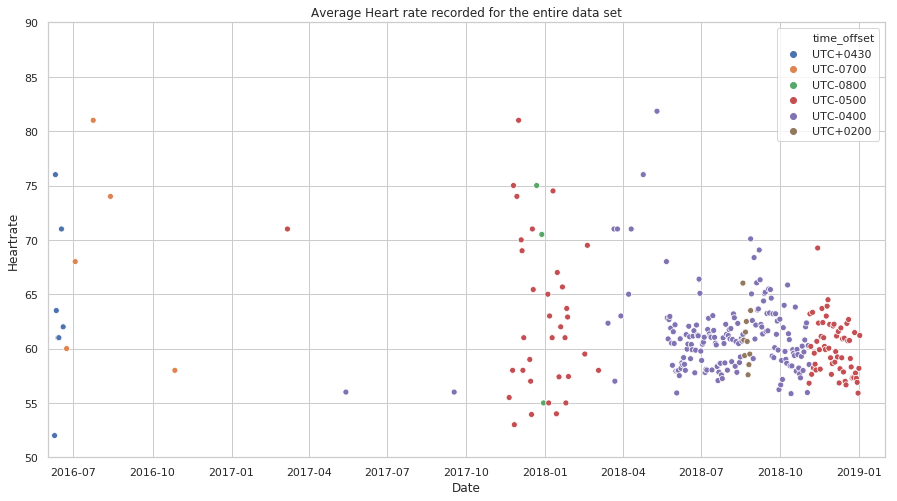

In [17]:
sns.set(style="whitegrid")
f,axes=plt.subplots(1,1, figsize=(15,8))
p=sns.scatterplot(x=gheart.start_time, y=gheart.heart_rate, hue=gheart.time_offset)
p.set(xlim = ('2016-06-01', '2019-01-31'))
p.set(ylim=(50, 90))
plt.xlabel("Date")
plt.ylabel("Heartrate")
plt.title("Average Heart rate recorded for the entire data set")

Again, as observed in the previous data set, there is huge change around Dec 2017 - either beacause of missing data or because the individual became active and more heart rate records started getting recorded. We can see the averages of the heartrate varying - the average value may not be very significant as some days have limited observations - and only high or low heartrates may be observed which will become the cumulative average for that day.

#### Zooming into the denser region of the above plot

Text(0.5, 1.0, 'Average Heart rate recorded for the entire data set')

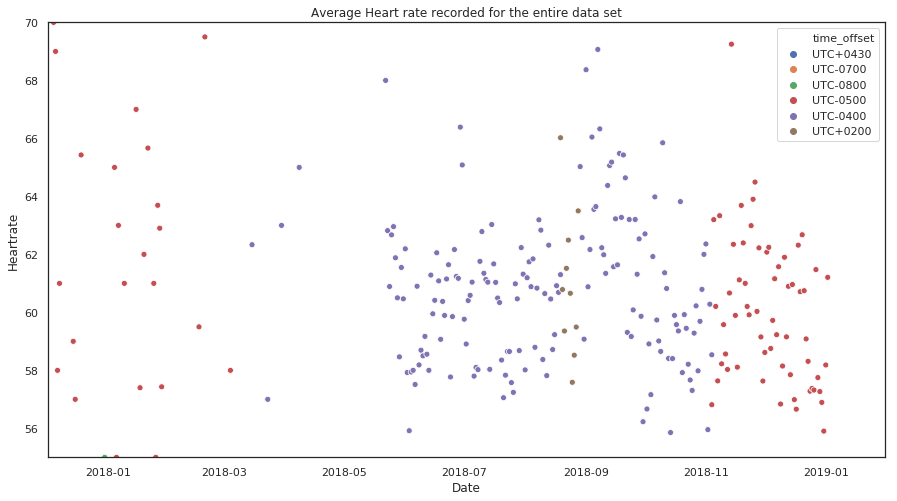

In [18]:
sns.set(style="white")
f,axes=plt.subplots(1,1, figsize=(15,8))
p=sns.scatterplot(x=gheart.start_time, y=gheart.heart_rate, hue=gheart.time_offset)
p.set(xlim = ('2017-12-01', '2019-01-31'))
p.set(ylim=(55, 70))
plt.xlabel("Date")
plt.ylabel("Heartrate")
plt.title("Average Heart rate recorded for the entire data set")

Text(0.5, 1.0, 'Average Heart rate recorded for the entire data set')

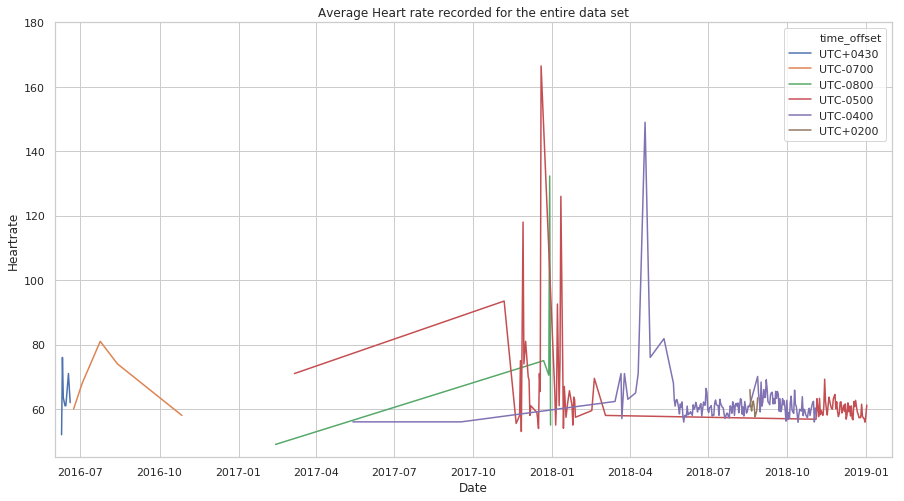

In [19]:
sns.set(style="whitegrid")
f,axes=plt.subplots(1,1, figsize=(15,8))
p=sns.lineplot(x=gheart.start_time, y=gheart.heart_rate, hue=gheart.time_offset)
p.set(xlim = ('2016-06-01', '2019-01-31'))
p.set(ylim=(45, 180))
plt.xlabel("Date")
plt.ylabel("Heartrate")
plt.title("Average Heart rate recorded for the entire data set")

### Heartrate by day

Text(0, 0.5, 'Heart Rate (BPM)')

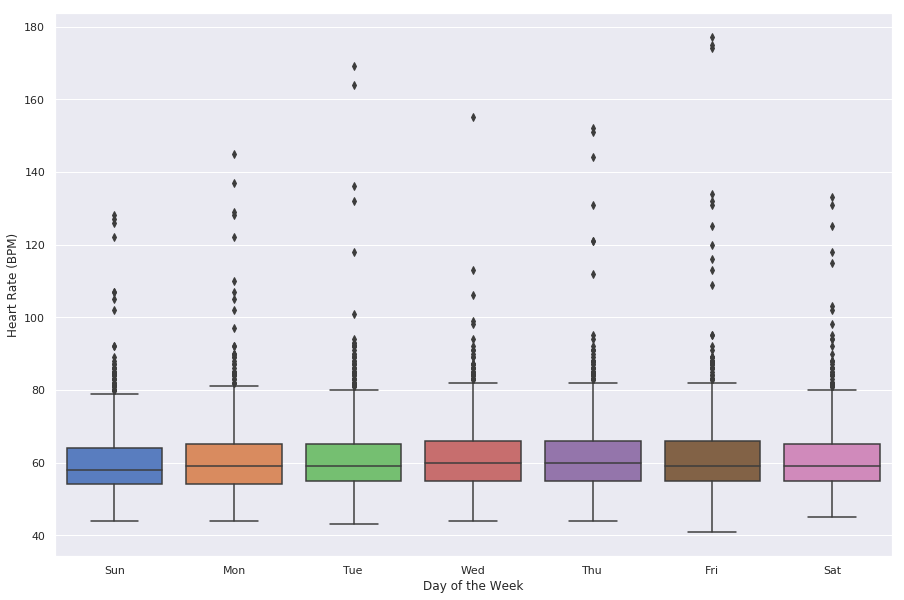

In [22]:
sns.set(style="darkgrid")
day_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
f,axes=plt.subplots(1,1, figsize=(15,10))
sns.boxplot(x=nheartrate['day'],y=nheartrate['heart_rate'], palette='muted', order=day_order)
plt.xlabel('Day of the Week')
plt.ylabel('Heart Rate (BPM)')

- From the above we can see that the heart rate range is between 45 - 65 for the majority of the data and the mean is around 56-58.
- If we compare it with the exercise dataset, since maximum exercise was done on Friadys least on Wednesday - we can see the number of outliers higher heart rates accordingly. 

### Heartrate by UTC zone

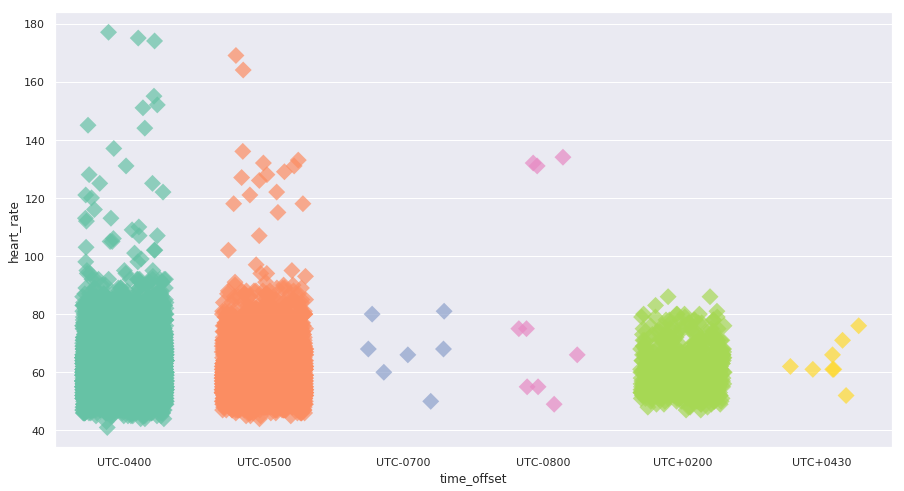

In [59]:
plt.subplots(1,1,figsize=(15,8))
utcorder=['UTC-0400', 'UTC-0500', 'UTC-0700', 'UTC-0800', 'UTC+0200', 'UTC+0430']
gheart=nheartrate[['time_offset','heart_rate']]
sns.stripplot(x=gheart.time_offset, y=gheart.heart_rate, order=utcorder, jitter=0.3, marker="D", palette="Set2", size=12, edgecolor="gray", alpha=.7)

- Like the previous datasets, majority of the heart rate points are in UTC -3/-4 location (present home)
- Heart rate goes above 100 rarely and happens mostly at UTC -4/-5 zone - which is when more high intensity activities are taking place.

### Heart Rate Recorded Times

[(-1, 25)]

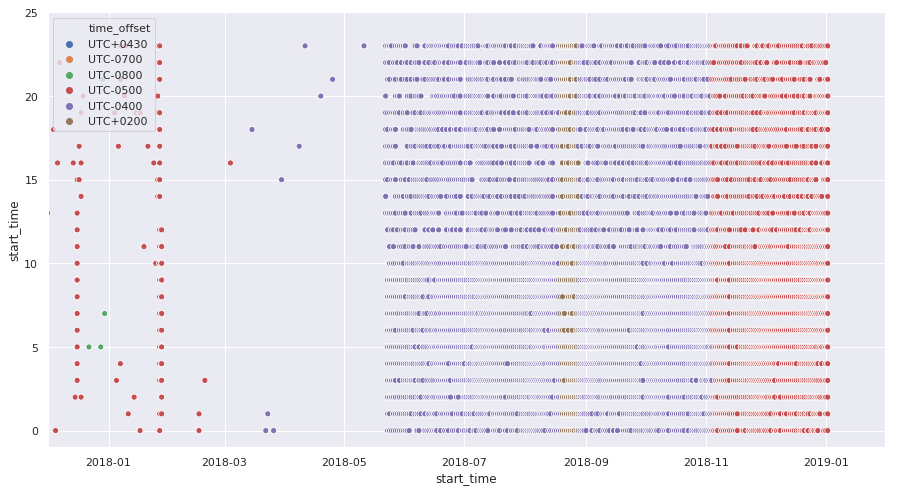

In [60]:
sns.set(style="darkgrid")
f, axes=plt.subplots(1,1, figsize=(15,8))
p=sns.scatterplot(x=nheartrate.start_time.dt.date, y=nheartrate.start_time.dt.hour, hue=nheartrate.time_offset)
p.set(xlim = ('2017-12-01', '2019-01-31'))
p.set(ylim=(-1, 25))

From the first plot, we can just see that there are many heart rate entries - but from the violin plot, we get to know that a bug chunk of the heart rate actually comes from 1 AM to 10 AM range.

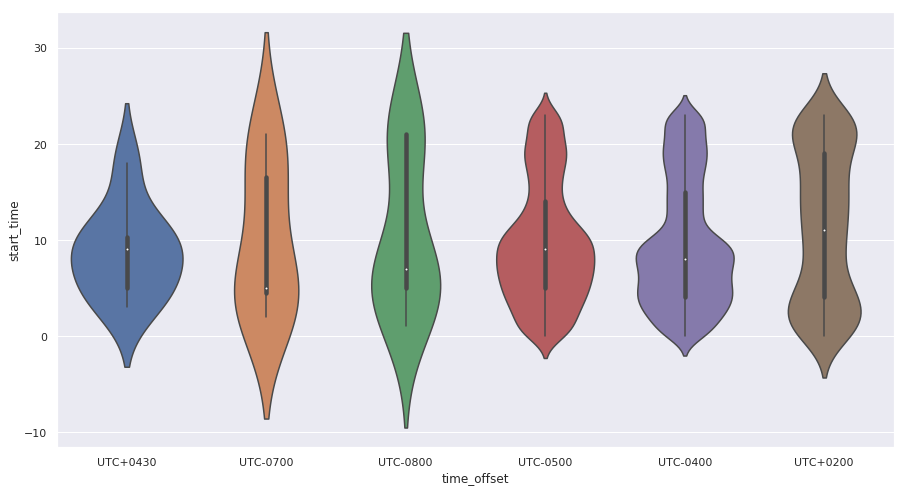

In [61]:
sns.set(style="darkgrid")
palette1 = sns.color_palette("mako_r", 7)
f, axes=plt.subplots(1,1, figsize=(15,8))
p=sns.violinplot(y=nheartrate.start_time.dt.hour, x=nheartrate.time_offset)

### Overall Observations
Again, like the exercise dataset, heart rate records are missing for time period till Dec 2017. Even if the person started exercising, if we had resting heart rate records, it would have been more useful to make observations. But from the lineplot and the scatterplot - we can see that the average heart rate has become lower by a very small margin - either this is a sign of the person getting fitter (as increasing fitness levels result in lower resting heart rates), or the person is just performing exercsies at a lower intensity. 

## Floors Climbed Dataset

### Overview of dataset

In [3]:
floorsclimbed.head()

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,custom,floor,datauuid,update_time,deviceuuid,create_time
0,0,2018-08-10 21:31:42.000,com.sec.android.app.shealth,UTC-0400,2018-08-10 21:30:01.000,NaN,8.0,000e4bf1-b1c0-2ec3-e713-826b9c3fef22,2018-08-10 21:31:53.453,F/D7+hL5E5,2018-08-10 21:31:52.856
1,1,2018-11-06 22:33:11.000,com.sec.android.app.shealth,UTC-0500,2018-11-06 22:32:54.000,NaN,1.0,0022234b-37ac-242d-bd1d-6a3bf2640b8d,2018-11-06 22:46:57.117,F/D7+hL5E5,2018-11-06 22:46:57.116
2,2,2018-07-03 11:50:25.000,com.sec.android.app.shealth,UTC-0400,2018-07-03 11:50:11.000,NaN,1.0,003cf4e5-e2e7-3282-6400-0b2f13e46ab5,2018-07-03 11:52:31.712,F/D7+hL5E5,2018-07-03 11:52:31.712
3,3,2018-01-25 02:30:56.000,com.sec.android.app.shealth,UTC-0500,2018-01-25 02:29:51.000,NaN,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-25 02:34:47.756,F/D7+hL5E5,2018-01-25 02:34:47.720
4,4,2018-07-03 12:42:05.000,com.sec.android.app.shealth,UTC-0400,2018-07-03 12:41:54.000,NaN,1.0,008bbe7f-26f7-5c1f-7f5d-5fa6d3e73f1c,2018-07-03 12:52:03.893,F/D7+hL5E5,2018-07-03 12:52:03.893


In [4]:
floorsclimbed.shape

(1180, 11)

In [5]:
floorsclimbed.dtypes

Unnamed: 0       int64
end_time        object
pkg_name        object
time_offset     object
start_time      object
custom         float64
floor          float64
datauuid        object
update_time     object
deviceuuid      object
create_time     object
dtype: object

In [6]:
floorsclimbed.describe()

,Unnamed: 0,custom,floor
count,1180.000000,0.0,1180.000000
mean,589.500000,NaN,2.267797
std,340.780966,NaN,2.521389
min,0.000000,NaN,1.000000
25%,294.750000,NaN,1.000000
50%,589.500000,NaN,1.000000
75%,884.250000,NaN,2.000000
max,1179.000000,NaN,19.000000


### Cleaning the dataset

In [7]:
floorsclimbed.isnull().sum()

Unnamed: 0        0
end_time          0
pkg_name          0
time_offset       0
start_time        0
custom         1180
floor             0
datauuid          0
update_time       0
deviceuuid        0
create_time       0
dtype: int64

We will clean the dataset by removing columns with missing values so that we can make clear observations.

In [8]:
#Dropping unneccessary columns 
nfloorsclimbed=floorsclimbed.drop(columns=['Unnamed: 0','custom'])
#Rearrange columns so that it is easier to interpret data
nfloorsclimbed=nfloorsclimbed[['start_time', 'end_time', 'time_offset', 'floor', 'update_time', 'create_time', 'pkg_name', 'datauuid', 'deviceuuid']]

In [9]:
nfloorsclimbed.deviceuuid.unique()

array(['F/D7+hL5E5'], dtype=object)

In [10]:
#Convert start_time, end_time, update_time and create_time to datetime values
nfloorsclimbed["start_time"]=pd.to_datetime(nfloorsclimbed["start_time"])
nfloorsclimbed["end_time"]=pd.to_datetime(nfloorsclimbed["end_time"])
nfloorsclimbed["create_time"]=pd.to_datetime(nfloorsclimbed["create_time"])
nfloorsclimbed["update_time"]=pd.to_datetime(nfloorsclimbed["update_time"])

In [11]:
#Creating a new column - time taken - to calculate total time taken to climb floors
newcol=pd.to_datetime(nfloorsclimbed['end_time']-nfloorsclimbed["start_time"])
nfloorsclimbed["time taken"]=newcol.dt.time
#Rearranging columns
nfloorsclimbed=nfloorsclimbed[['start_time', 'end_time', 'time_offset', 'time taken', 'floor', 'create_time', 'update_time', 'pkg_name', 'datauuid']]
#sorting values as per nstarttime
nfloorsclimbed.sort_values("start_time", axis=0, inplace=True)
nfloorsclimbed.reset_index(drop=True, inplace=True)

Similar to the previous data set, we will correct the datetime values and add the day of the week column.

In [12]:
nfloorsclimbed.time_offset.unique()

array(['UTC-0500', 'UTC-0800', 'UTC-0400', 'UTC+0200'], dtype=object)

In [13]:
#Adding days of the week column to the dataframe
dayofweek=pd.DataFrame()
daylist=[]
for i in nfloorsclimbed['start_time']:
    daylist.append(i.strftime("%a"))
dayofweek=dayofweek.append(daylist)
nfloorsclimbed["day"]=dayofweek

### Floors climbed vs Time taken

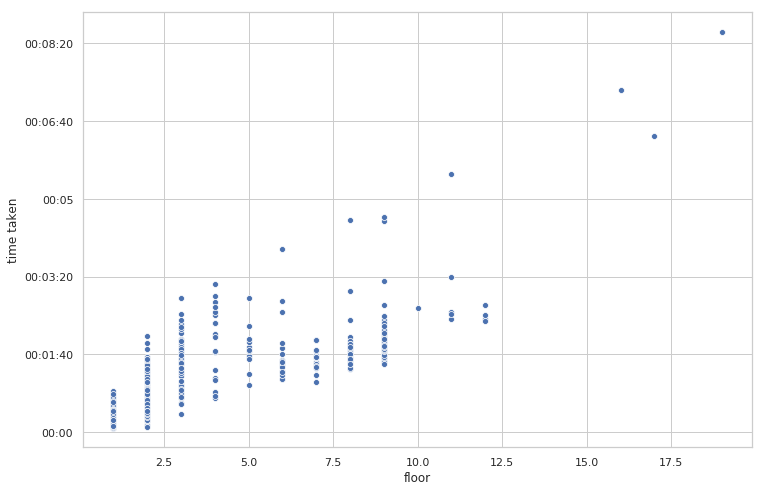

In [14]:
sns.set(style="whitegrid")
f, axes=plt.subplots(1,1, figsize=(12,8))
sns.scatterplot(x=nfloorsclimbed['floor'], y=nfloorsclimbed['time taken'])

- On an average, time taken to climb a certain number of floors increases with the number of increasing floors. 

- There is variance in the range of time taken to climb the same floor - the individual probably climbed the floors at different places and different circumstances (if something had to be done urgently as opposed to leisurely.)

### Floors climbed history

In [15]:
gfloorbydate=nfloorsclimbed.groupby([nfloorsclimbed['start_time'].dt.date, "time_offset"]).sum()
gfloorbydate=gfloorbydate.reset_index()
gfloorbydate.columns

Index(['start_time', 'time_offset', 'floor'], dtype='object')

Text(0.5, 0, 'Date')

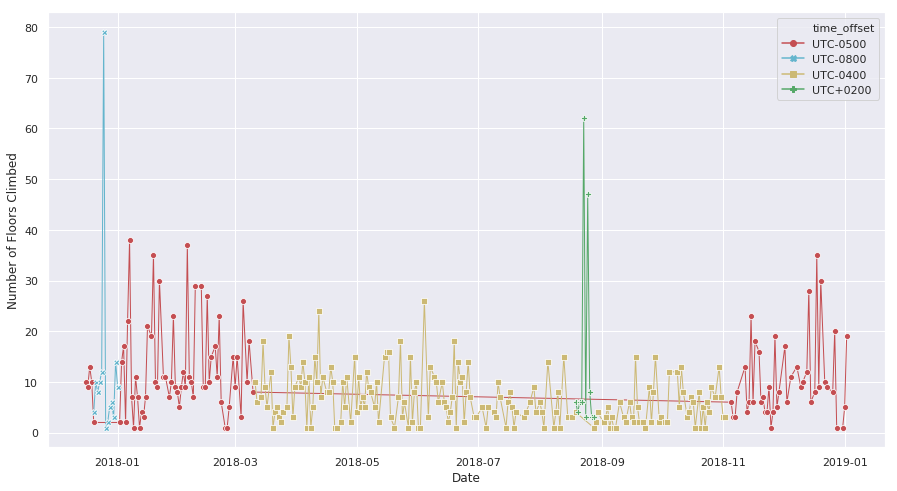

In [19]:
sns.set(style="darkgrid")
#palette1 = sns.color_palette("mako_r", 4)
palette1=["r", "c", "y", "g"]
f, axes=plt.subplots(1,1, figsize=(15,8))
sns.lineplot(x=gfloorbydate.start_time, y=gfloorbydate.floor, hue=gfloorbydate.time_offset, linewidth=1, palette=palette1, style=gfloorbydate.time_offset, markers=True, dashes=False)
plt.ylabel("Number of Floors Climbed")
plt.xlabel("Date")

- Just like the previous datasets, majority of the floors have been climbed in the UTC-4/-5 zone (home location)
- There are two instances where a lot of floors were climbed - both took place outside home location
- Floors climbed is otherwise mostly lies in the range of 0-30 floors with more floors being climbed in the UTC -5 time period (most likely winter where the person probably spent more time indoors)

### Floors climbed by day

Text(0, 0.5, 'Number of Floors')

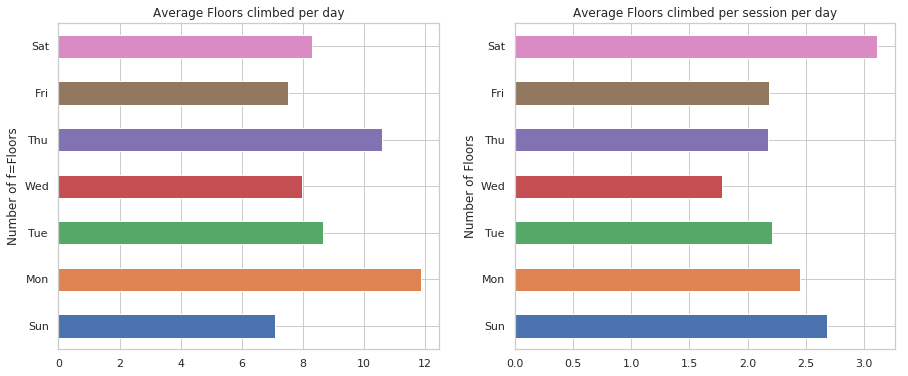

In [76]:
g_floor=nfloorsclimbed.groupby([nfloorsclimbed.start_time.dt.date,'day']).sum()
g_floor.reset_index(inplace=True)

g_plot=g_floor.groupby('day').mean()['floor']
g_plot2=nfloorsclimbed.groupby('day').mean()['floor']
day_order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
g_plot=g_plot.reindex(index=day_order)
g_plot2=g_plot2.reindex(index=day_order)

sns.set(style="whitegrid")
plt.subplots(figsize=(15,6))
#average floors climbed per day
ax1=plt.subplot(121)
g_plot.plot(kind='barh')
ax1.set_title("Average Floors climbed per day")
ax1.set_ylabel("Number of f=Floors")
#average floors climbed per session
ax2=plt.subplot(122)
g_plot2.plot(kind='barh')
ax2.set_title("Average Floors climbed per session per day")
ax2.set_ylabel("Number of Floors")

- Mondays and Thursdays have the highest floors climbed on an average
- Average number of floors climbed per session is more or less same with Wednesdays having less number of floors climbed.

### Floor climb times

[(736664.0, 737090.0)]

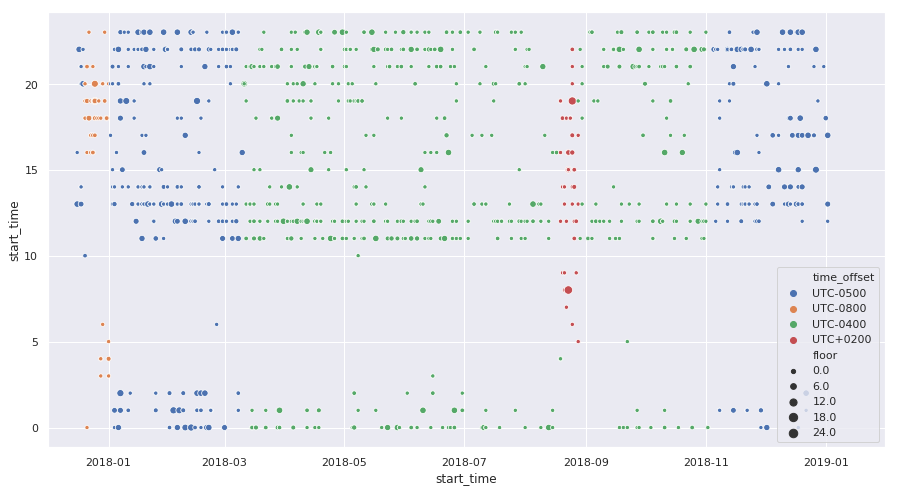

In [77]:
sns.set(style="darkgrid")
f, axes=plt.subplots(1,1, figsize=(15,8))
p=sns.scatterplot(x=nfloorsclimbed.start_time.dt.date, y=nfloorsclimbed.start_time.dt.hour, hue=nfloorsclimbed.time_offset, size=nfloorsclimbed.floor)
p.set(xlim = ('2017-12-01', '2019-01-31'))

- From the above, we can see tht most floor climbs took place in the -4/-5 zone.
- There is not much of pattern when it comes to number of floors climbed related to day time, though slightly lesser number of floors are climbed in the morning hours of around 11. 
- Around sleep time, 1AM - 9AM, there are not too many floors climbed entries.
- In the fall-winter months, number of floors climbed are slightly higher

### Overall Observations
There isn't too much information that we get from this dataset - the floors climbed by this individual are similar to that of an average active person - from this we know that this person is definitely not old. We may get more insights from this dataset if we combine its data with other sets in the project.  

## Step Count Dataset 

### Overview of the dataset

In [155]:
stepcount.head()

,Unnamed: 0,end_time,start_time,count,calorie,sample_position_type,deviceuuid,update_time,speed,pkg_name,time_offset,custom,distance,datauuid,create_time
0,0,2018-12-26 23:27:59.999,2018-12-26 23:27:00.000,70,3.44,230002.0,F/D7+hL5E5,2018-12-26 23:35:00.296,1.833333,com.sec.android.app.shealth,UTC-0500,NaN,60.88,00083c05-4f22-1522-694a-36bd54e6f09b,2018-12-26 23:35:00.296
1,1,2018-12-08 23:12:00.000,2018-12-08 23:11:00.000,1,0.04,NaN,jQfnryI8/B,2018-12-08 23:11:00.484,1.333333,com.sec.android.app.shealth,UTC-0500,NaN,0.77,00122feb-c1d7-497f-98ad-0c0e31e89465,2018-12-08 23:11:00.484
2,2,2018-12-08 21:53:59.999,2018-12-08 21:53:00.000,30,1.25,230002.0,F/D7+hL5E5,2018-12-08 21:55:00.238,1.250000,com.sec.android.app.shealth,UTC-0500,NaN,21.25,00152c2f-41ce-c19e-67c0-264c410a6a77,2018-12-08 21:55:00.237
3,3,2019-01-02 13:34:00.000,2019-01-02 13:33:00.000,37,1.48,NaN,jQfnryI8/B,2019-01-02 13:35:02.630,1.361111,com.sec.android.app.shealth,UTC-0500,NaN,28.58,001ac2c7-696b-4d29-b5f9-4fc4c8db4b66,2019-01-02 13:35:02.630
4,4,2019-01-01 22:36:59.999,2019-01-01 22:36:00.000,18,0.75,230002.0,F/D7+hL5E5,2019-01-01 22:55:00.224,1.500000,com.sec.android.app.shealth,UTC-0500,NaN,12.72,001ba89a-82c9-2b91-359d-778bf774182d,2019-01-01 22:55:00.224


In [156]:
stepcount.shape

(6199, 15)

In [157]:
stepcount.describe()

,Unnamed: 0,count,calorie,sample_position_type,speed,custom,distance
count,6199.000000,6199.000000,6199.000000,4314.0,6199.000000,0.0,6199.000000
mean,3099.000000,47.930473,2.252730,230002.0,1.467301,NaN,36.162816
std,1789.641491,33.584263,1.980601,0.0,0.408126,NaN,26.880485
min,0.000000,0.000000,0.000000,230002.0,0.000000,NaN,0.000000
25%,1549.500000,20.000000,0.850000,230002.0,1.222222,NaN,14.730000
50%,3099.000000,37.000000,1.610000,230002.0,1.416667,NaN,27.700000
75%,4648.500000,71.000000,3.180000,230002.0,1.611111,NaN,51.890000
max,6198.000000,161.000000,15.620000,230002.0,6.944445,NaN,162.620000


In [158]:
stepcount.dtypes

Unnamed: 0                int64
end_time                 object
start_time               object
count                     int64
calorie                 float64
sample_position_type    float64
deviceuuid               object
update_time              object
speed                   float64
pkg_name                 object
time_offset              object
custom                  float64
distance                float64
datauuid                 object
create_time              object
dtype: object

### Cleaning the dataset

We will clean the dataset similar to the previous datasets.

In [159]:
stepcount.isnull().sum()

Unnamed: 0                 0
end_time                   0
start_time                 0
count                      0
calorie                    0
sample_position_type    1885
deviceuuid                 0
update_time                0
speed                      0
pkg_name                   0
time_offset                0
custom                  6199
distance                   0
datauuid                   0
create_time                0
dtype: int64

In [160]:
stepcount.deviceuuid.unique()

array(['F/D7+hL5E5', 'jQfnryI8/B'], dtype=object)

In [161]:
nstep=stepcount.drop(columns=['Unnamed: 0', 'custom', 'sample_position_type'])
nstep.columns
nstep=nstep[['start_time', 'end_time', 'count', 'calorie', 'speed', 'distance', 'create_time', 'update_time', 'time_offset', 'pkg_name', 'deviceuuid', 'datauuid']]

In [162]:
#Convert start_time, end_time, update_time and create_time to datetime values
nstep["start_time"]=pd.to_datetime(nstep["start_time"])
nstep["end_time"]=pd.to_datetime(nstep["end_time"])
nstep["create_time"]=pd.to_datetime(nstep["create_time"])
nstep["update_time"]=pd.to_datetime(nstep["update_time"])

In [163]:
#sorting values as per nstarttime
nstep.sort_values("start_time", axis=0, inplace=True)
nstep.reset_index(drop=True, inplace=True)

In [164]:
nstep.time_offset.unique()

array(['UTC-0500'], dtype=object)

In [165]:
#Adding days of the week column to the dataframe
dayofweek=pd.DataFrame()
daylist=[]
for i in nstep['start_time']:
    daylist.append(i.strftime("%a"))
dayofweek=dayofweek.append(daylist)
nstep["day"]=dayofweek

In [166]:
time_taken=nstep.end_time-nstep.start_time
time_taken=pd.to_datetime(time_taken)
print(time_taken.dt.time.min())
print(time_taken.dt.time.max())

00:00:59.999000
00:01:00


We can see that the time taken for all step counts from start to finish are wither 59.99 seconds or 60 seconds. Therefore, we can condiser that all steps are steps recorded for a total of one minute.

In [167]:
nstep.start_time.dt.date.unique()

array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 2),
       datetime.date(2018, 12, 3), datetime.date(2018, 12, 4),
       datetime.date(2018, 12, 5), datetime.date(2018, 12, 6),
       datetime.date(2018, 12, 7), datetime.date(2018, 12, 8),
       datetime.date(2018, 12, 9), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 16),
       datetime.date(2018, 12, 17), datetime.date(2018, 12, 18),
       datetime.date(2018, 12, 19), datetime.date(2018, 12, 20),
       datetime.date(2018, 12, 21), datetime.date(2018, 12, 22),
       datetime.date(2018, 12, 23), datetime.date(2018, 12, 24),
       datetime.date(2018, 12, 25), datetime.date(2018, 12, 26),
       datetime.date(2018, 12, 27), datetime.date(2018, 12, 28),
       datetime.date(2018, 12, 29)

We can see that there are stepcount data entries only from Nov 29, 2018 - Jan 3 2019 only - for a period of over a month which is quite less when comapred to the other datasets.

We will however proceed to do an analysis from whatever data is there, and see if we can get some insights.

### Pairplots - Calories vs Distance vs Count vs Speed

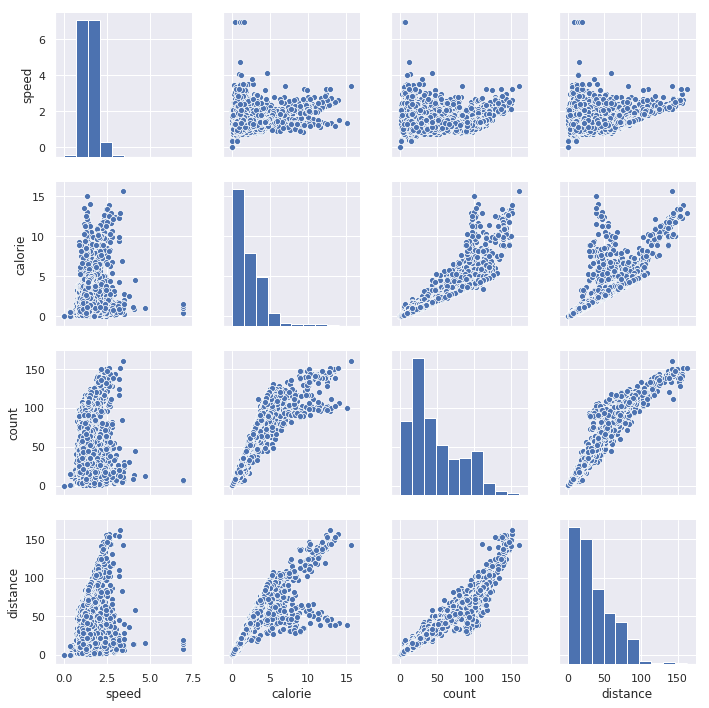

In [29]:
pair_plot=nstep[['speed', 'calorie', 'count', 'distance']]
sns.pairplot(data=pair_plot)

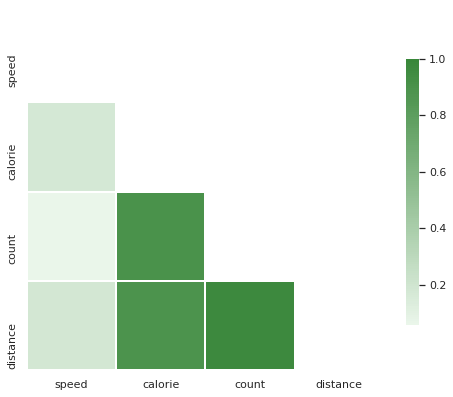

In [30]:
sns.set(style='white')
corr=pair_plot.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(19, 128, as_cmap=True)

plt.subplots(figsize=(8, 7))
sns.heatmap(corr, mask=mask, vmax=1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .7}, cmap=cmap)

From the above two plots, we can see that there is strong correlation between calorie, count and distance. Speed however, is not correlated to any of the other properties.

### Plotting over days of the dataset

We can see that this individual has walked several times in the same day. Therefore, we group by date to get the all walks for a particular day.

In [31]:
#createing a new date column from the corrected start time
stepbydate=nstep.groupby(nstep.start_time.dt.date).sum()

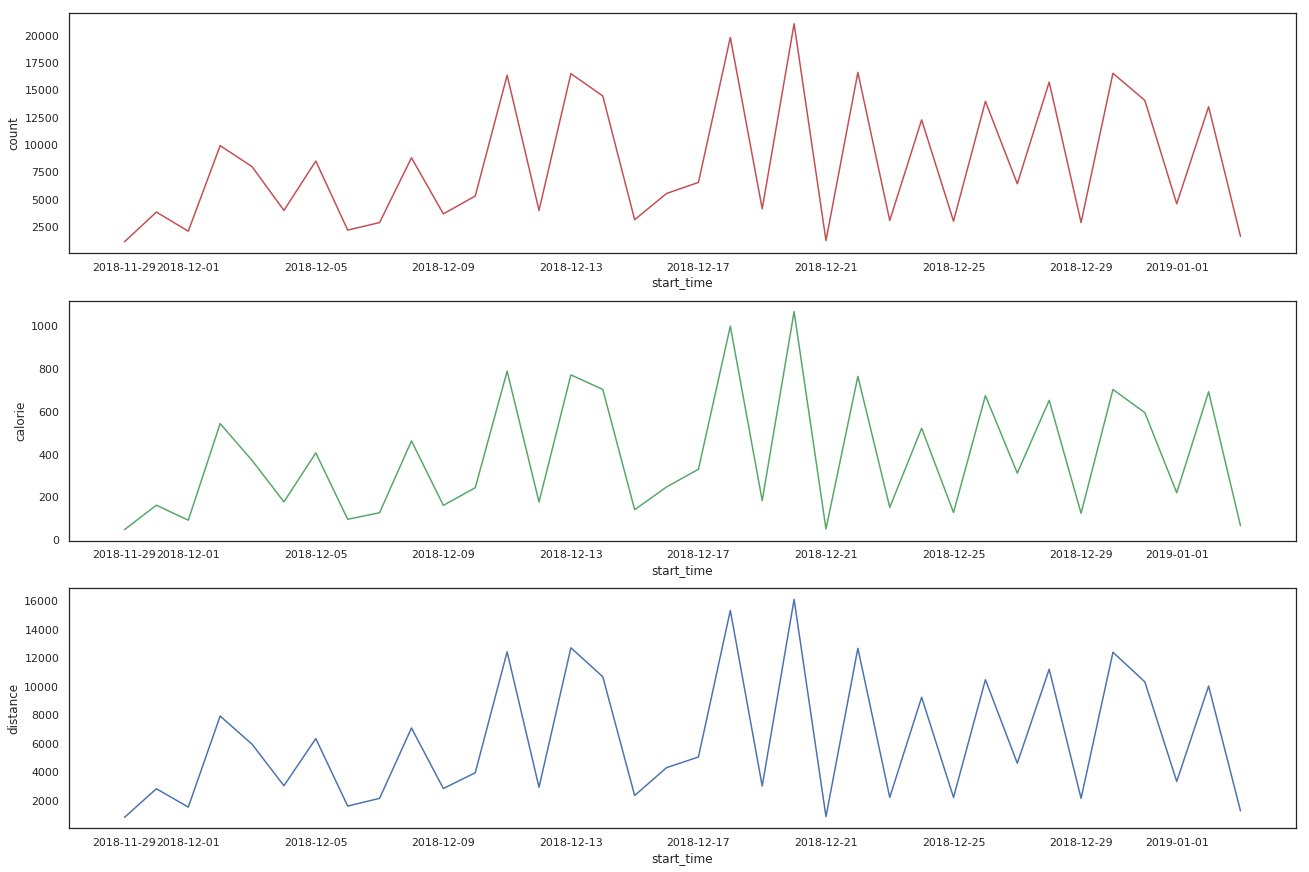

In [32]:
f=plt.figure(figsize=(22,15))

ax=plt.subplot(311)
sns.lineplot(x=stepbydate.index, y=stepbydate["count"], color="r")

ax2=plt.subplot(312)
sns.lineplot(x=stepbydate.index, y=stepbydate["calorie"], color="g")

ax3=plt.subplot(313)
sns.lineplot(x=stepbydate.index, y=stepbydate["distance"])

From the above, it is very clear that all the 3 measurements - distance, calorie and count are proportional as their plots look almost alike.

### Plotting over days of the week

#### Average per session of steps per days of a week

Text(0, 0.5, 'Average Speed / minute')

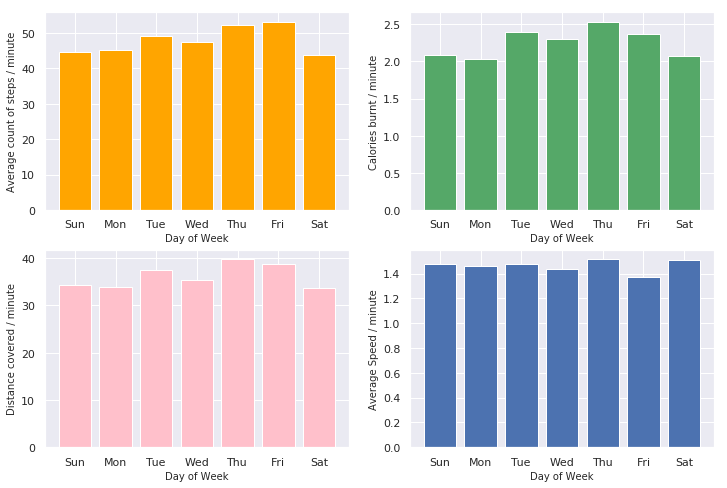

In [33]:
gstepbydate=nstep.groupby('day').mean()
day_order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
gstepbydate=gstepbydate.reindex(index=day_order)
sns.set(style="darkgrid")
f=plt.figure(figsize=(12,8))

ax=plt.subplot(221)
plt.bar(gstepbydate.index, gstepbydate['count'], color="orange")
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Average count of steps / minute', fontsize=10)

ax2=plt.subplot(222)
plt.bar(gstepbydate.index, gstepbydate['calorie'], color="g")
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Calories burnt / minute', fontsize=10)

ax3=plt.subplot(223)
plt.bar(gstepbydate.index, gstepbydate['distance'], color="pink")
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Distance covered / minute', fontsize=10)

ax3=plt.subplot(224)
plt.bar(gstepbydate.index, gstepbydate['speed'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Average Speed / minute', fontsize=10)

- From the previous plot, we know that count, calorie and distance are proportional - the same is reflected in their averages per session as well. The values of these three parameters are slightly higher on Tuesdays, Thursdays and Fridays and low on Saturday, Sunday, Monday.

- The average speed does not vary much and is quite consistent between 1.3 and 1.4

### Step count history

(array([737027., 737029., 737033., 737037., 737041., 737045., 737049.,
        737053., 737057., 737060.]), <a list of 10 Text xticklabel objects>)

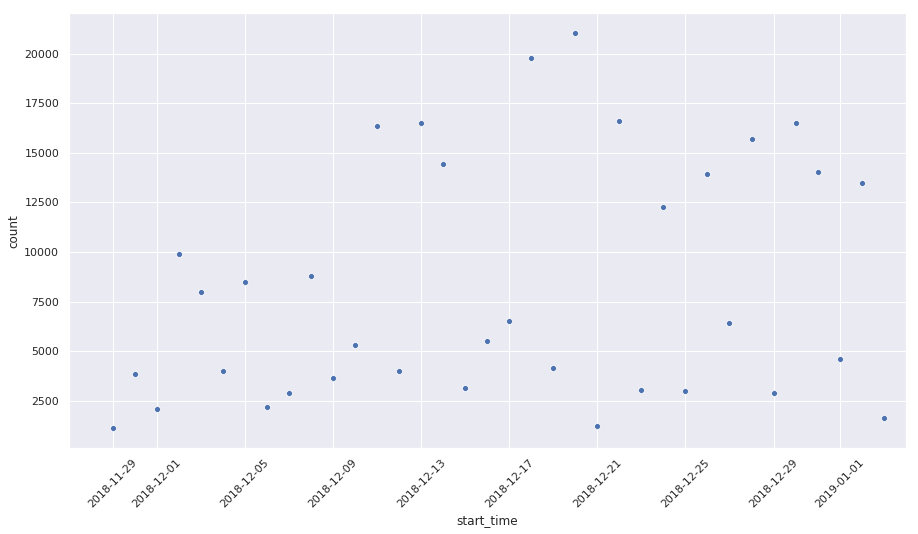

In [34]:
stepdate=stepbydate.reset_index()
sns.set(style="darkgrid")
f, axes=plt.subplots(1,1, figsize=(15,8))
p=sns.scatterplot(x=stepdate.start_time, y=stepdate['count'])
p.set(xlim = ('2018-11-27', '2019-01-04'))
plt.xticks(rotation=45)

We can see that this person's stepcounts vary quite a bit. On some days, the step count is only around 2000 whereas on other days it can go more than 25000 steps. We can say that this person is fairly active looking at the walking patterns - however, we need to check whether the step counts in this dataset are related to the other datasets - for eg: if running in the exercise dateset is counted as a part of the stepcount of this dataset. 

### Step count times

Text(0.5, 0, 'Date')

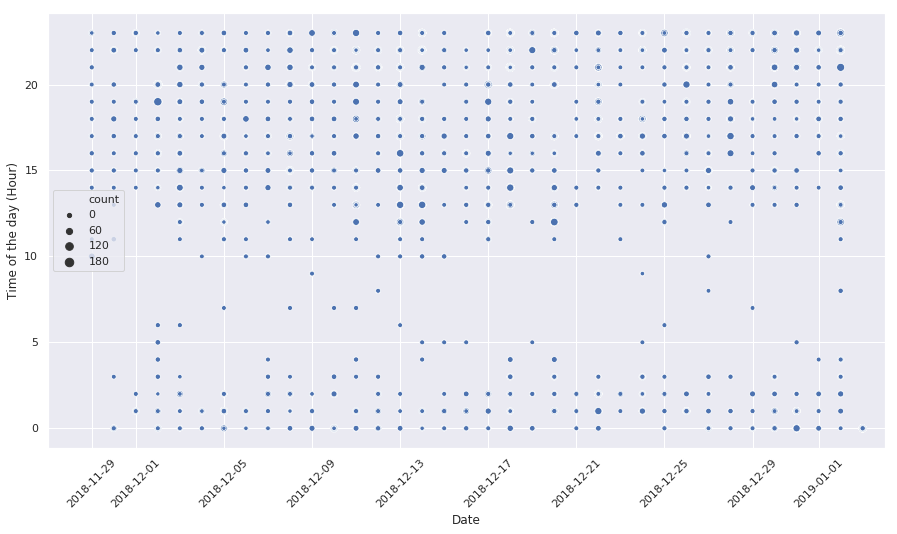

In [36]:
sns.set(style="darkgrid")
f, axes=plt.subplots(1,1, figsize=(15,8))
p=sns.scatterplot(x=nstep.start_time.dt.date, y=nstep.start_time.dt.hour, size=nstep['count'])
p.set(xlim = ('2018-11-27', '2019-01-04'))
plt.xticks(rotation=45)
plt.ylabel('Time of the day (Hour)')
plt.xlabel('Date')
#p.set(ylim=(-1, 25))

We can see that there are a lot of steps taken throughout the day. From the limited data, we can see that the individual walks at most times of the day, sometimes even during sleep hours. But the bulk of the walks is usually in the 11AM - 9PM.

### Height and gender estimation

In general, if you divide a person's step length by their height, the ratio value you get is about 0.4 (with a range from about 0.41 to 0.45). This is why you can take a person's step length and divide it by about 0.43 to roughly estimate their height. (Source:https://www.scientificamerican.com/article/bring-science-home-estimating-height-walk/)

In [98]:
meanstep=stepbydate['count'].mean()
meandist=stepbydate.distance.mean()
avgstride=meandist/meanstep
avgstride
print("The person's estimated minimum height is ", avgstride/0.45*100,"cms")
print("The person's estimated average height is ", avgstride/0.43*100,"cms")
print("The person's estimated maximum height is ", avgstride/0.41*100,"cms")

The person's estimated minimum height is  167.66330310105613 cms
The person's estimated average height is  175.4615962685471 cms
The person's estimated maximum height is  184.02069852554942 cms


From the height estimates for the North American region (as the UTC zone is north american zone), it looks like the person's gender is mostly male. 

As a lot of the data is missing, we are not able to make concrete conclusions from this dataset. However, we can say that this person is active conisdering the average stepcount values. 

## Sleep Dataset

### Overview of dataset

In [99]:
sleepdata.head()

,Unnamed: 0,efficiency,extra_data,has_sleep_data,com.samsung.health.sleep.comment,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.deviceuuid,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,com.samsung.health.sleep.pkg_name,original_efficiency
0,0,91.540790,NaN,1.0,NaN,00018ab3-e237-658f-6a4c-0ac9fd1e439e,NaN,NaN,1538205120000,NaN,1538185320000,UTC-0400,F/D7+hL5E5,1538205990294,NaN,1538205990294,com.sec.android.app.shealth,NaN
1,1,90.769230,NaN,1.0,NaN,0191b301-17de-40e1-0626-909863967f0f,NaN,NaN,1536662400000,NaN,1536635160000,UTC-0400,F/D7+hL5E5,1536663146013,NaN,1536663146013,com.sec.android.app.shealth,NaN
2,2,97.391304,NaN,1.0,NaN,01df9633-a82a-cf08-921c-358a47c0f1bb,NaN,NaN,1535714940000,NaN,1535708100000,UTC-0400,F/D7+hL5E5,1535715043724,NaN,1535715043724,com.sec.android.app.shealth,NaN
3,3,92.555330,NaN,1.0,NaN,0398e3ab-bec6-2ad9-8fae-9d64ea80e7c1,NaN,NaN,1543055160000,NaN,1543025400000,UTC-0500,F/D7+hL5E5,1543055270788,NaN,1543055270788,com.sec.android.app.shealth,NaN
4,4,92.663040,NaN,1.0,NaN,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,2018-03-08 09:30:00.000,1520479380000,UTC-0500,F/D7+hL5E5,1520516398387,2018-03-08 03:23:00.000,1520501522181,com.sec.android.app.shealth,92.66304


In [100]:
sleepdata.shape

(501, 18)

In [101]:
sleepdata.dtypes

Unnamed: 0                                int64
efficiency                              float64
extra_data                              float64
has_sleep_data                          float64
com.samsung.health.sleep.comment        float64
com.samsung.health.sleep.datauuid        object
quality                                 float64
com.samsung.health.sleep.custom         float64
com.samsung.health.sleep.end_time         int64
original_wake_up_time                    object
com.samsung.health.sleep.start_time       int64
com.samsung.health.sleep.time_offset     object
com.samsung.health.sleep.deviceuuid      object
com.samsung.health.sleep.update_time      int64
original_bed_time                        object
com.samsung.health.sleep.create_time      int64
com.samsung.health.sleep.pkg_name        object
original_efficiency                     float64
dtype: object

In [102]:
sleepdata.describe()

,Unnamed: 0,efficiency,extra_data,has_sleep_data,com.samsung.health.sleep.comment,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.update_time,com.samsung.health.sleep.create_time,original_efficiency
count,501.000000,501.000000,0.0,499.0,0.0,38.000000,0.0,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,36.000000
mean,250.000000,88.912608,NaN,1.0,NaN,50003.184211,NaN,1.530675e+12,1.530654e+12,1.530676e+12,1.530675e+12,93.029683
std,144.770508,13.422423,NaN,0.0,NaN,0.833594,NaN,9.275734e+09,9.275921e+09,9.274725e+09,9.275566e+09,2.387901
min,0.000000,0.000000,NaN,1.0,NaN,50001.000000,NaN,1.513425e+12,1.513401e+12,1.513426e+12,1.513426e+12,85.714290
25%,125.000000,89.436620,NaN,1.0,NaN,50003.000000,NaN,1.523172e+12,1.523152e+12,1.523172e+12,1.523172e+12,92.303657
50%,250.000000,91.434265,NaN,1.0,NaN,50003.000000,NaN,1.530963e+12,1.530932e+12,1.530964e+12,1.530964e+12,93.088888
75%,375.000000,93.069305,NaN,1.0,NaN,50004.000000,NaN,1.538386e+12,1.538362e+12,1.538386e+12,1.538386e+12,94.552854
max,500.000000,97.391304,NaN,1.0,NaN,50005.000000,NaN,1.546428e+12,1.546419e+12,1.546428e+12,1.546428e+12,96.572580


### Cleaning the dataset

In [59]:
sleepdata.isnull().sum()

Unnamed: 0                                0
efficiency                                0
extra_data                              501
has_sleep_data                            2
com.samsung.health.sleep.comment        501
com.samsung.health.sleep.datauuid         0
quality                                 463
com.samsung.health.sleep.custom         501
com.samsung.health.sleep.end_time         0
original_wake_up_time                   465
com.samsung.health.sleep.start_time       0
com.samsung.health.sleep.time_offset      0
com.samsung.health.sleep.deviceuuid       0
com.samsung.health.sleep.update_time      0
original_bed_time                       465
com.samsung.health.sleep.create_time      0
com.samsung.health.sleep.pkg_name         0
original_efficiency                     465
dtype: int64

In [60]:
# We will drop null value columns
nsleepdata=sleepdata.drop(columns=['Unnamed: 0', 'extra_data', 'com.samsung.health.sleep.comment', 'com.samsung.health.sleep.custom', 'original_bed_time', 'original_wake_up_time', 'original_efficiency'])

In [61]:
nsleepdata.columns

Index(['efficiency', 'has_sleep_data', 'com.samsung.health.sleep.datauuid',
       'quality', 'com.samsung.health.sleep.end_time',
       'com.samsung.health.sleep.start_time',
       'com.samsung.health.sleep.time_offset',
       'com.samsung.health.sleep.deviceuuid',
       'com.samsung.health.sleep.update_time',
       'com.samsung.health.sleep.create_time',
       'com.samsung.health.sleep.pkg_name'],
      dtype='object')

In [62]:
#renaming the columns
nsleepdata.columns=['efficiency', 'has_sleep_data', 'datauuid', 'quality', 'end_time', 'start_time', 'time_offset', 'deviceuuid', 'update_time', 'create_time', 'pkg_name']

In [63]:
#rearranging the columns
nsleepdata=nsleepdata[['start_time', 'end_time', 'create_time', 'update_time', 'efficiency', 'quality', 'time_offset', 'has_sleep_data', 'datauuid', 'deviceuuid', 'pkg_name']]

In [64]:
nsleepdata["start_time"]=pd.to_datetime(nsleepdata["start_time"], unit='ms')
nsleepdata["end_time"]=pd.to_datetime(nsleepdata["end_time"], unit='ms')
nsleepdata["create_time"]=pd.to_datetime(nsleepdata["create_time"], unit='ms')
nsleepdata["update_time"]=pd.to_datetime(nsleepdata["update_time"], unit='ms')

In [65]:
#replace missing values with 1.0 in has_sleep_data column since all values are 1.0
nsleepdata['has_sleep_data']=nsleepdata['has_sleep_data'].fillna(1.0)

In [66]:
#need to sort columns
nsleepdata.sort_values("start_time", axis=0, inplace=True)
nsleepdata.reset_index(drop=True, inplace=True)

In [67]:
nsleepdata.time_offset.unique()

array(['UTC-0500', 'UTC-0800', 'UTC-0400', 'UTC+0200'], dtype=object)

Sleepdata has four differnent UTC time zones and there might be some caluculations (such as calculating bed time), where the offset may need to be considered. Therefore, we will create a new column where UTC time will be 0000.

In [68]:
a=[]
b=[]
c=pd.DataFrame()
d=pd.DataFrame()

for i in range(501):
    if(nsleepdata['time_offset'][i]=='UTC-0500'):
        a.append(nsleepdata['start_time'][i]-timedelta(hours=5))
        b.append(nsleepdata['end_time'][i]-timedelta(hours=5))
    elif(nsleepdata['time_offset'][i]=='UTC-0800'):
        a.append(nsleepdata['start_time'][i]-timedelta(hours=8))
        b.append(nsleepdata['end_time'][i]-timedelta(hours=8))
    elif(nsleepdata['time_offset'][i]=='UTC-0400'):
        a.append(nsleepdata['start_time'][i]-timedelta(hours=4))
        b.append(nsleepdata['end_time'][i]-timedelta(hours=4))
    elif(nsleepdata['time_offset'][i]=='UTC+0200'):
        a.append(nsleepdata['start_time'][i]+timedelta(hours=2))
        b.append(nsleepdata['end_time'][i]+timedelta(hours=2))
c=c.append(a)
d=d.append(b)

In [69]:
nsleepdata['nstarttime']=c
nsleepdata['nendtime']=d

In [70]:
# Calculate total time in bed in minutes
newcol2=pd.DataFrame()
newcol2=nsleepdata.end_time-nsleepdata.start_time
nsleepdata["time in bed (min)"]=pd.to_datetime(newcol2).dt.hour*60+pd.to_datetime(newcol2).dt.minute

In [71]:
nsleepdata.columns

Index(['start_time', 'end_time', 'create_time', 'update_time', 'efficiency',
       'quality', 'time_offset', 'has_sleep_data', 'datauuid', 'deviceuuid',
       'pkg_name', 'nstarttime', 'nendtime', 'time in bed (min)'],
      dtype='object')

In [72]:
nsleepdata=nsleepdata[['start_time', 'end_time', 'time in bed (min)', 'nstarttime', 'nendtime','create_time', 'update_time', 'efficiency', 'quality', 'time_offset', 'has_sleep_data', 'datauuid', 'deviceuuid', 'pkg_name']]

In [73]:
#exporting for dash - nsleepdata.to_csv (r'/home/abhi/Desktop/Lantern/project_2/dash.csv', index = None, header=True)
#sample=pd.read_csv('/home/abhi/Desktop/Lantern/project_2/dash.csv')
#Adding days of the week column to the dataframe based on default UTC Date
dayofweek=pd.DataFrame()
daylist=[]
for i in nsleepdata["start_time"]:
    daylist.append(i.strftime("%a"))
dayofweek=dayofweek.append(daylist)
nsleepdata["Day"]=dayofweek

### Sleep Distribution

Text(0.5, 0, 'Date')

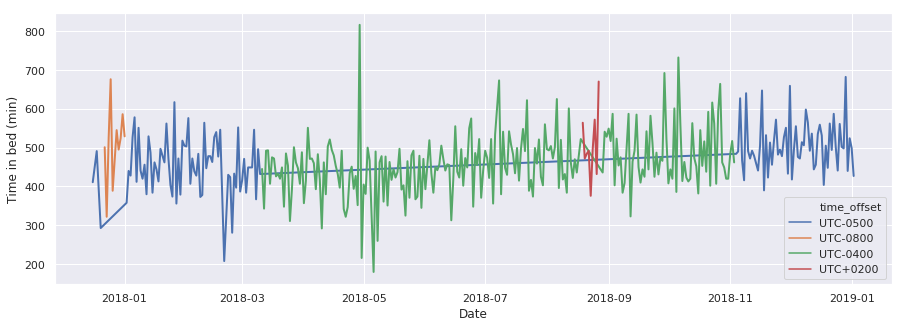

In [99]:
plt.subplots(1,1,figsize=(15,5))
sns.set(style="darkgrid")
gsleep_dist=nsleepdata.groupby([nsleepdata.start_time.dt.date, nsleepdata["time_offset"]]).sum()
gsleep_dist=gsleep_dist.reset_index(level=1)
sns.lineplot(x=gsleep_dist.index, y=gsleep_dist["time in bed (min)"], data=gsleep_dist, linewidth=2, hue=gsleep_dist["time_offset"])
plt.ylabel('Time in bed (min)')
plt.xlabel('Date')

- Time in bed is mostly in the range of 350-500 (6-8 hours) minute range - which is a decent range of sleep
- We can a that the average sleep time is slowly increasing towards the later parts of the dataset

### Bedtime hours

Text(0.5, 0, 'Start of Bed Time (Hour)')

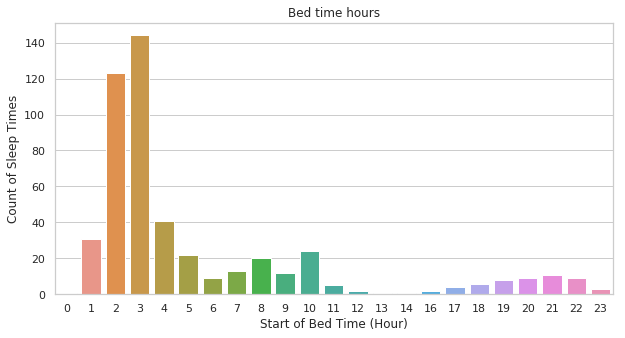

In [97]:
sns.set(style="whitegrid")
plt.subplots(figsize=(10,5))
sns.countplot(nsleepdata["start_time"].dt.hour)
plt.title("Bed time hours")
plt.ylabel('Count of Sleep Times')
plt.xlabel('Start of Bed Time (Hour)')

Text(0.5, 1.0, 'Bed time hours with offset at UTC-0000')

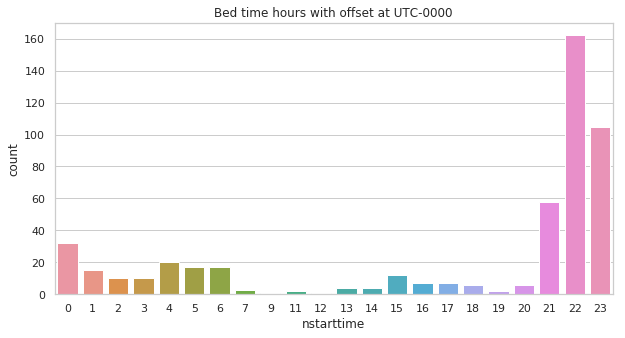

In [78]:
sns.set(style="whitegrid")
plt.subplots(figsize=(10,5))
sns.countplot(nsleepdata["nstarttime"].dt.hour)
plt.title("Bed time hours with offset at UTC-0000")

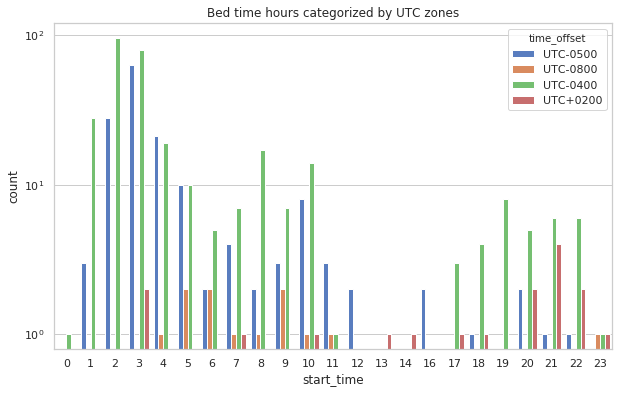

In [95]:
plt.subplots(figsize=(10,6))
g=sns.countplot(x=nsleepdata["start_time"].dt.hour, hue=nsleepdata["time_offset"], palette="muted")
g.figure.get_axes()[0].set_yscale('log')
plt.title("Bed time hours categorized by UTC zones")
plt.show()

In the above plot, we have used start time columns to obtain the day of the week. 
- We can see there are four UTC values - two of them correspond to the same location with daylight savings (-4 and -5).
- The other locations are observed when the individual is probably travelling and hence sleeping at odd times. 
- This is evident from the plots as well - as the person's bed time is almost always around 2 - 3 AM for UTC-5 and -5.
- Even the overal sleep times go on to prove the same. 
- Bed time hours with the offset at UTC-0000 have higher values that correspond to ideal bed times - however, the Samsung Data for trackers suggest that if the UTC zone is set, it will affect the start and end times - therefore, for purposes of this analysis, since the tracker is able to locate the person based on the time zone he is in, we will assume that the time values get updated with the time zones - so we will consider data that have offset values adjusted.

### Sleep Duration

In [123]:
print("The minimum sleeping time is ", nsleepdata["time in bed (min)"].min(), "minutes")
print("The maximum sleeping time is ", nsleepdata["time in bed (min)"].max(), "minutes")
print("The average sleeping time is ", nsleepdata["time in bed (min)"].mean(), "minutes")

The minimum sleeping time is  10 minutes
The maximum sleeping time is  640 minutes
The average sleeping time is  347.7245508982036 minutes


From the above, we can see that the minimum sleep time reflects naps, or periods of (broken or) short sleep. To investigate further, we will again check the minimum, maximum and average sleep times after removing naps.

Here, we will consider all sleeps that start after the period of 9 AM - 7 PM and are lesser than 150 min in duration as naps. (Research has show that most adults will cycle through the full non-REM and REM cycle every 90 to 120 minutes - we will consider 150 min, with 30 min buffer for time to fall asleep / extra sleep.)

In [112]:
mask=((nsleepdata.start_time.dt.hour>18) & (nsleepdata.start_time.dt.hour<24)) | ((nsleepdata.start_time.dt.hour>=0) & (nsleepdata.start_time.dt.hour<9)) | (nsleepdata['time in bed (min)']>150) 

In [113]:
nonap=nsleepdata[mask]

In [126]:
print("The minimum sleeping time is ", nonap["time in bed (min)"].min(), "minutes")
print("The maximum sleeping time is ", nonap["time in bed (min)"].max(), "minutes")
print("The average sleeping time is ", nonap["time in bed (min)"].mean(), "minutes")

The minimum sleeping time is  10 minutes
The maximum sleeping time is  640 minutes
The average sleeping time is  376.72185430463577 minutes


Again, we see that the minimum maximum times haven't changed. On closer observation of data, as below, we can see that this person has had several sleeps from 2:56 AM till 11:47 AM. Either the person was awake for a while in between sleeps (as seen in the time difference between first and second sleep observations) or as the device may not have recorded sleeps for a short time (as seen in time difference between second and third sleep observations).

In [127]:
obs=date(2018, 1, 3)
nonap[((nonap.start_time.dt.date)==obs)]

,start_time,end_time,time in bed (min),nstarttime,nendtime,create_time,update_time,efficiency,quality,time_offset,has_sleep_data,datauuid,deviceuuid,pkg_name,Day
16,2018-01-03 02:56:00,2018-01-03 04:01:00,65,2018-01-02 21:56:00,2018-01-02 23:01:00,2018-01-03 04:02:18.717,2018-01-03 04:02:18.717,72.72727,NaN,UTC-0500,1.0,f4102932-0997-e575-1483-aa96681a1a28,F/D7+hL5E5,com.sec.android.app.shealth,Wed
17,2018-01-03 04:55:00,2018-01-03 05:05:00,10,2018-01-02 23:55:00,2018-01-03 00:05:00,2018-01-03 05:19:48.280,2018-01-03 05:19:48.280,0.00000,NaN,UTC-0500,1.0,78d01a70-9f6d-3a94-505a-dfc6bdb18ed2,F/D7+hL5E5,com.sec.android.app.shealth,Wed
18,2018-01-03 05:22:00,2018-01-03 05:38:00,16,2018-01-03 00:22:00,2018-01-03 00:38:00,2018-01-03 05:53:17.298,2018-01-03 05:53:17.298,0.00000,NaN,UTC-0500,1.0,ad17d745-a7bd-5a6b-f886-b9c2b6b77dd0,F/D7+hL5E5,com.sec.android.app.shealth,Wed
19,2018-01-03 05:58:00,2018-01-03 11:47:00,349,2018-01-03 00:58:00,2018-01-03 06:47:00,2018-01-03 12:02:12.286,2018-01-03 12:02:12.286,94.85715,NaN,UTC-0500,1.0,c951e281-e034-5cda-9119-110eabd0557e,F/D7+hL5E5,com.sec.android.app.shealth,Wed


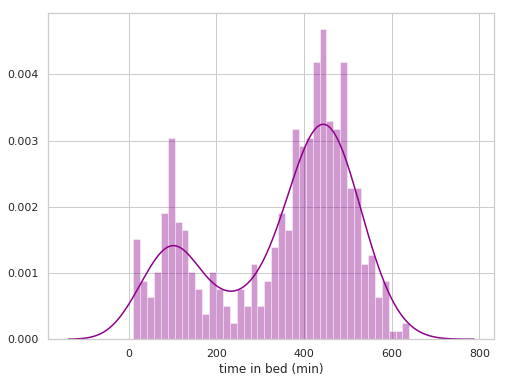

In [128]:
plt.subplots(1,1,figsize=(8,6))
sns.distplot(nsleepdata["time in bed (min)"], bins=40, color="darkmagenta")

From the above, we can see that the individuals sleep pattern is quite varied. The maximum and the minimum sleeping times are 640 and 10 minutes respectively, as noted earlier. Since there are multiple sleep records on a single recorded date, all the individual sleeps are seen on the graph.

The averge sleeping time, including naps, is about 375 minutes and we can see from the histogram above that majority of the sleep is distributed between 350 and 500 minutes.

### Naps

In [100]:
mask=(nsleepdata.start_time.dt.hour>9) & (nsleepdata.start_time.dt.hour<=19) & (nsleepdata['time in bed (min)']<150)

In [101]:
naps=nsleepdata[mask]

[(0, 22)]

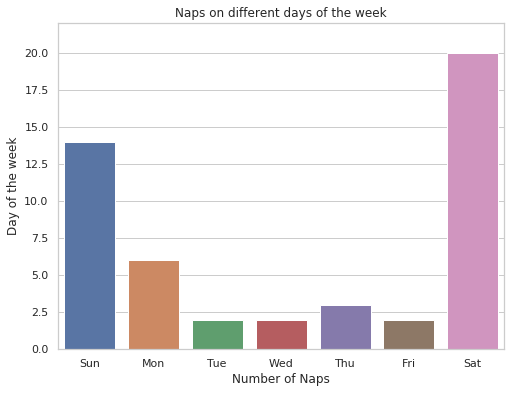

In [106]:
#plotting maps
day_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
#getting sleep times less than 120 minutes
#naps=nsleepdata[nsleepdata["time in bed (min)"]<120]
plt.subplots(1,1,figsize=(8,6))
sns.set(style="whitegrid")
p=sns.countplot(x=naps["Day"], order=day_order)
plt.title("Naps on different days of the week")
plt.ylabel('Day of the week')
plt.xlabel('Number of Naps')
p.set(ylim = (0,22))

In [107]:
naps

,start_time,end_time,time in bed (min),nstarttime,nendtime,create_time,update_time,efficiency,quality,time_offset,has_sleep_data,datauuid,deviceuuid,pkg_name,Day
32,2018-01-14 10:51:00,2018-01-14 11:07:00,16,2018-01-14 05:51:00,2018-01-14 06:07:00,2018-01-14 11:21:57.264,2018-01-14 11:21:57.264,0.000000,NaN,UTC-0500,1.0,a0e2e4f0-4348-bd0f-deb7-d0bb14167884,F/D7+hL5E5,com.sec.android.app.shealth,Sun
33,2018-01-14 11:21:00,2018-01-14 11:50:00,29,2018-01-14 06:21:00,2018-01-14 06:50:00,2018-01-14 11:57:55.709,2018-01-14 11:57:55.709,83.333330,NaN,UTC-0500,1.0,4f3a6409-0ad8-c03e-a02f-0c74f9845c64,F/D7+hL5E5,com.sec.android.app.shealth,Sun
41,2018-01-22 11:46:00,2018-01-22 12:20:00,34,2018-01-22 06:46:00,2018-01-22 07:20:00,2018-01-22 12:34:56.405,2018-01-22 12:34:56.405,60.000004,NaN,UTC-0500,1.0,40a05fac-79e8-b953-9997-3427163986e6,F/D7+hL5E5,com.sec.android.app.shealth,Mon
47,2018-01-27 10:54:00,2018-01-27 11:14:00,20,2018-01-27 05:54:00,2018-01-27 06:14:00,2018-01-27 11:16:33.141,2018-01-27 13:32:00.998,85.714290,50001.0,UTC-0500,1.0,ac71b014-b737-4d4e-0198-1a9172fd65f8,F/D7+hL5E5,com.sec.android.app.shealth,Sat
51,2018-01-29 10:23:00,2018-01-29 10:38:00,15,2018-01-29 05:23:00,2018-01-29 05:38:00,2018-01-29 10:53:04.278,2018-01-29 10:53:04.278,0.000000,NaN,UTC-0500,1.0,8de7476d-fca9-cc01-54e2-80b862e7aae2,F/D7+hL5E5,com.sec.android.app.shealth,Mon
64,2018-02-10 16:52:00,2018-02-10 19:19:00,147,2018-02-10 11:52:00,2018-02-10 14:19:00,2018-02-10 19:33:51.280,2018-02-10 19:33:51.280,95.945946,NaN,UTC-0500,1.0,7c701a40-4bb2-932b-c664-5e211bf1e815,F/D7+hL5E5,com.sec.android.app.shealth,Sat
127,2018-04-08 10:12:00,2018-04-08 11:48:00,96,2018-04-08 06:12:00,2018-04-08 07:48:00,2018-04-08 12:02:53.301,2018-04-08 12:02:53.301,89.690720,NaN,UTC-0400,1.0,753a183f-0858-2913-3f91-d918410ec670,F/D7+hL5E5,com.sec.android.app.shealth,Sun
137,2018-04-16 10:33:00,2018-04-16 10:55:00,22,2018-04-16 06:33:00,2018-04-16 06:55:00,2018-04-16 11:09:42.283,2018-04-16 11:09:42.283,82.608696,NaN,UTC-0400,1.0,8d71859f-edec-23ae-ec48-f8bd0d016bfa,F/D7+hL5E5,com.sec.android.app.shealth,Mon
154,2018-04-28 10:30:00,2018-04-28 10:48:00,18,2018-04-28 06:30:00,2018-04-28 06:48:00,2018-04-28 10:56:46.916,2018-04-28 10:56:46.916,0.000000,NaN,UTC-0400,1.0,6a607e26-b756-985f-baf2-2804d74755d4,F/D7+hL5E5,com.sec.android.app.shealth,Sat
178,2018-05-15 10:16:00,2018-05-15 10:53:00,37,2018-05-15 06:16:00,2018-05-15 06:53:00,2018-05-15 11:08:24.262,2018-05-15 11:08:24.262,92.105260,NaN,UTC-0400,1.0,09c1e778-d39c-2bf5-32db-6b6cbc05aec7,F/D7+hL5E5,com.sec.android.app.shealth,Tue


As the dataset is small, we haven't observed a large number of naps. However, we can see that weekends are preferred for naps. The days of the week are considered without changin the offset values.

[(736664.0, 737092.0)]

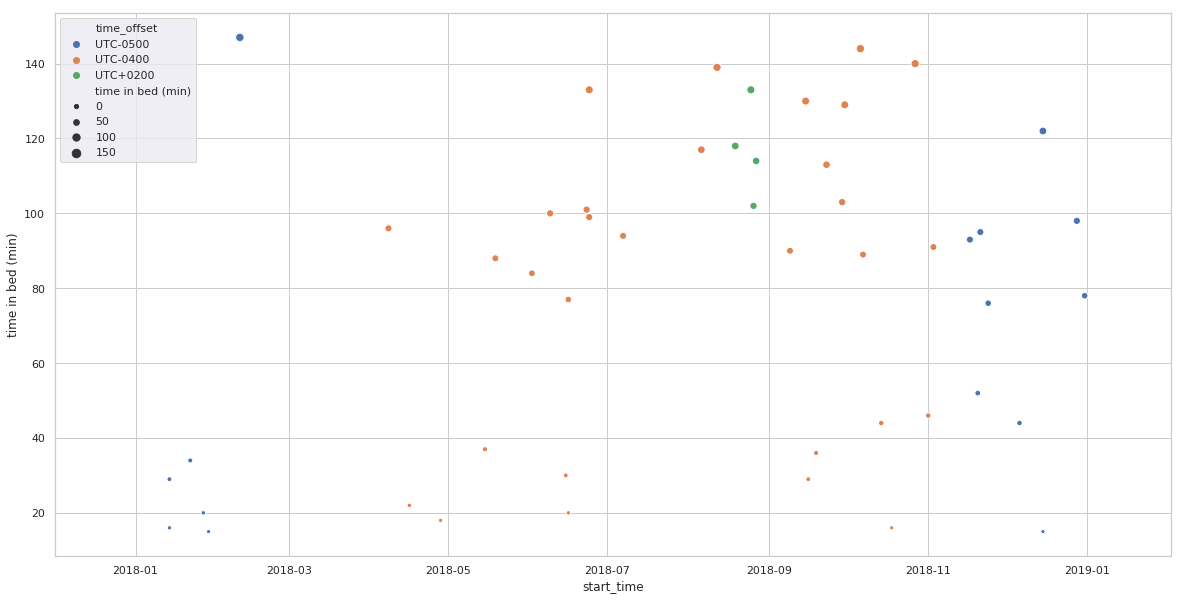

In [132]:
plt.subplots(1,1,figsize=(20,10))
sns.set(style="darkgrid")
ax=sns.scatterplot(x=naps.start_time.dt.date, y=naps['time in bed (min)'], data=naps, hue=naps.time_offset, linewidth=1, size="time in bed (min)")
ax.set(xlim = ('2017-12-01', '2019-02-02'))

### Sleep duration for different quarters in a year
We will now divide the sleep duration for different quarters in year (quarter 1 is Jan -Mar, quarter 2 is Apr-Jun and so on) and plot the duration to check if we can find a pattern.

In [133]:
quart1=nsleepdata[(nsleepdata["start_time"].dt.month==1) | (nsleepdata["start_time"].dt.month==2) | (nsleepdata["start_time"].dt.month==3)]["time in bed (min)"]
quart2=nsleepdata[(nsleepdata["start_time"].dt.month==4) | (nsleepdata["start_time"].dt.month==5) | (nsleepdata["start_time"].dt.month==6)]["time in bed (min)"]
quart3=nsleepdata[(nsleepdata["start_time"].dt.month==7) | (nsleepdata["start_time"].dt.month==8) | (nsleepdata["start_time"].dt.month==7)]["time in bed (min)"]
quart4=nsleepdata[(nsleepdata["start_time"].dt.month==10) | (nsleepdata["start_time"].dt.month==11) | (nsleepdata["start_time"].dt.month==12)]["time in bed (min)"]

In [134]:
print("\nAverage sleep time for different periods:\n")
print("Jan-Mar months:", quart1.mean(), "minutes")
print("Apr-Jun months:", quart2.mean(), "minutes")
print("Jul-Sep months:", quart3.mean(), "minutes")
print("Oct-Dec months:", quart4.mean(), "minutes")


Average sleep time for different periods:

Jan-Mar months: 377.48571428571427 minutes
Apr-Jun months: 305.1796875 minutes
Jul-Sep months: 344.86046511627904 minutes
Oct-Dec months: 377.1764705882353 minutes


We can see that average sleep duration is low during Apr-Jun period (summer) and high during Oct-Dec period (winter). (We are assuming that the person lives in the northern hemisphere die to the given UTC timezones.) 

The sleep duration for the other quarters is almost the same and its values are between the summer and winter quarters.

We will plot the four quarters below.

Text(0.5, 1.0, 'Oct-Dec')

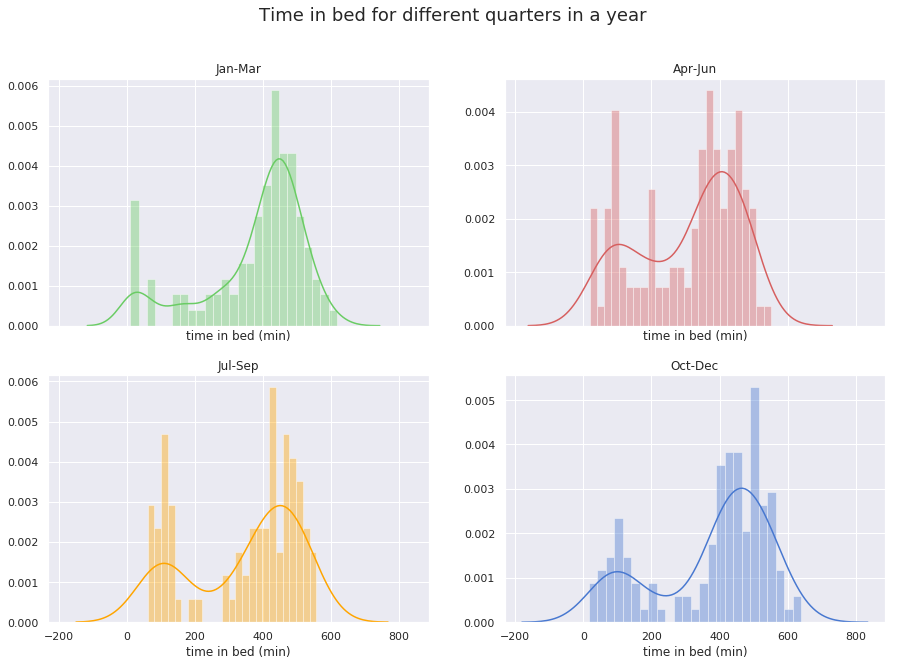

In [135]:
sns.set(style="darkgrid", palette="muted", color_codes=True)

f,axes=plt.subplots(2,2, figsize=(15,10), sharex=True)
f.suptitle("Time in bed for different quarters in a year", size=18)

sns.distplot(quart1, bins=25, ax=axes[0,0], color="g")
axes[0,0].set_title("Jan-Mar")

sns.distplot(quart2, bins=25, ax=axes[0,1], color="r")
axes[0,1].set_title("Apr-Jun")

sns.distplot(quart3, bins=25, ax=axes[1,0], color="orange")
axes[1,0].set_title("Jul-Sep")

sns.distplot(quart4, bins=25, ax=axes[1,1], color="b")
axes[1,1].set_title("Oct-Dec")

- Overall, the last two quarters have slightly higher sleep times. 
- The same is reflected by the average calculations as well, suggesting the the individual sleeps slightly more more during winter months.

## Bedtimes further investigation

Let us now plot the time to bed along the date to investigate further. We will get the bed times from the dataset after removing naps. We will manipulate the dataset to contain only the initial sleeping time for every single data record.

In [136]:
# extracting date, sleeptime and timzoe from nonaps dataset
time_to_bed=nonap[['start_time','time_offset', 'time in bed (min)']]
time_to_bed['date']=time_to_bed.start_time.dt.date
time_to_bed['start_sleep_hr']=time_to_bed.start_time.dt.hour

#retaining only inital sleep times by dropping duplicate date records, and droppping start_time column
time_to_bed.drop(columns='start_time', inplace=True)
time_to_bed.drop_duplicates(subset='date', keep='first', inplace=True)

time_to_bed.head()

,time_offset,time in bed (min),date,start_sleep_hr
0,UTC-0500,411,2017-12-16,5
1,UTC-0500,491,2017-12-18,3
2,UTC-0500,293,2017-12-20,3
3,UTC-0800,501,2017-12-22,8
4,UTC-0800,322,2017-12-23,9


[(736634.0, 737120.0)]

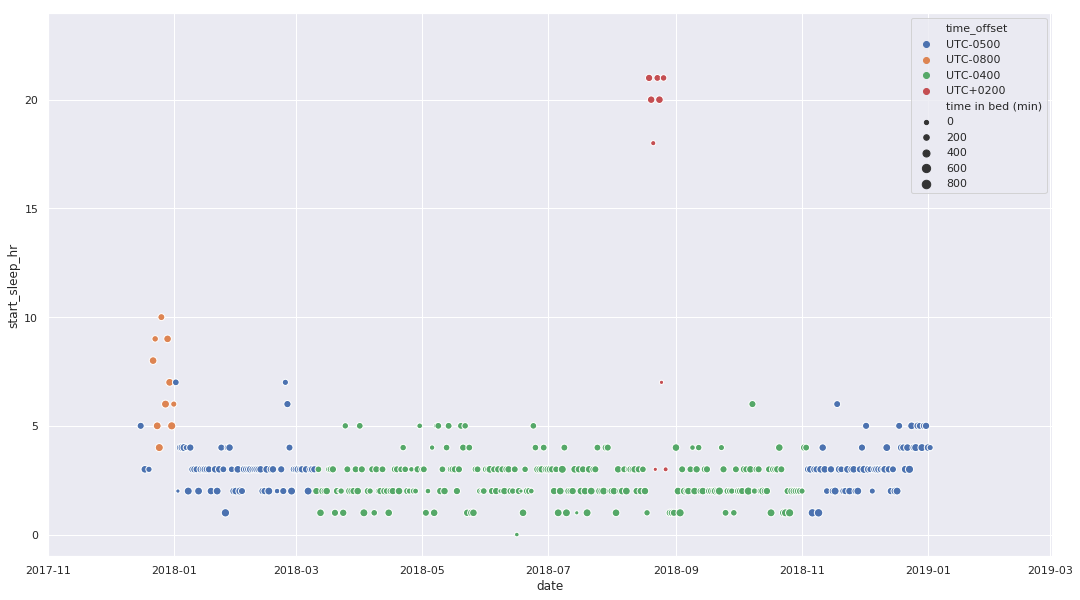

In [137]:
plt.subplots(1,1,figsize=(18,10))
sns.set(style="darkgrid")
p=sns.scatterplot(x=time_to_bed.date, y=time_to_bed.start_sleep_hr, data=time_to_bed, linewidth=1, hue=time_to_bed.time_offset, size="time in bed (min)")
plt.ylim(-1, 24)
p.set(xlim = ('2017-11-01', '2019-03-02'))

- The time of sleeping (after removing nap times), is somewhat consistent between 1 AM and 5 AM for home time zones -4 and -5. 
- We can see that the person sleeps later when the timezone changes to -8 (assuming he's travelling), in the 4AM to 10AM range. The sleeptimes shifts by approx 3 hours - which is again consistent with his then home timezone of -5.    
- Around Sept 2018, again when the time zone changes to +2, the sleep timings vary between 10PM and 3AM, with one or two sleeps at 6AM - 7 AM (in the plot above the lines are joined in the opposite direction - this can be confusing - but sleep times start at night). There is difference of about 6 hours from the persons then home zone times (from -4 to +2) - so again, even though he is sleeping at certain odd times, some of his sleeps are consistent with that of his home zone, i.e, homezone sleeptimes (1AM - 5AM) range has become earlier by approx. the difference in time zones.  
- Therefore, we can conclude that the sleep times have remained somewhat consistent for the entire dataset.



In [138]:
#Wake up time
# extracting date, sleeptime and timzoe from nonaps dataset
time_to_wake=nonap[['end_time','time_offset', 'time in bed (min)']]
time_to_wake['date']=time_to_wake.end_time.dt.date
time_to_wake['end_sleep_hr']=time_to_wake.end_time.dt.hour

#retaining only inital sleep times by dropping duplicate date records, and droppping start_time column
time_to_wake.drop(columns='end_time', inplace=True)
time_to_wake.drop_duplicates(subset='date', keep='last', inplace=True)

time_to_wake.head()

,time_offset,time in bed (min),date,end_sleep_hr
0,UTC-0500,411,2017-12-16,11
1,UTC-0500,491,2017-12-18,11
2,UTC-0500,293,2017-12-20,8
3,UTC-0800,501,2017-12-22,17
4,UTC-0800,322,2017-12-23,15


[(736634.0, 737120.0)]

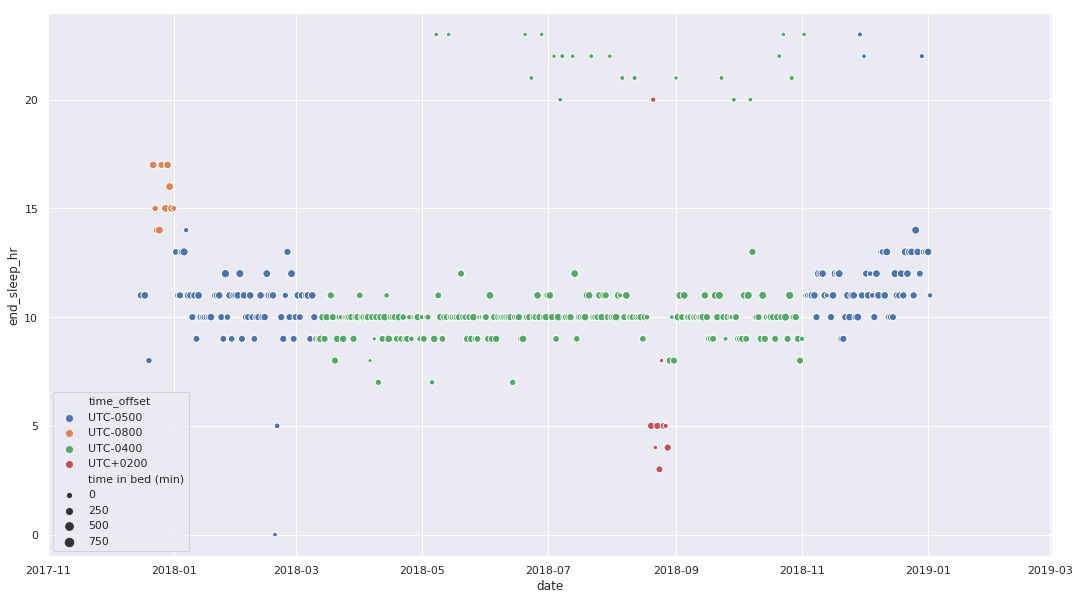

In [139]:
plt.subplots(1,1,figsize=(18,10))
sns.set(style="darkgrid")
p=sns.scatterplot(x=time_to_wake.date, y=time_to_wake.end_sleep_hr, data=time_to_wake, linewidth=1, hue=time_to_wake.time_offset, size="time in bed (min)")
plt.ylim(-1, 24)
p.set(xlim = ('2017-11-01', '2019-03-02'))


The small points above account for sleep on those days where the individual started sleep before 12 PM and woke up suddnely, then continued sleeping

### Sleep duration on different days

Since, we have considered sleep times less than 120 minutes as naps, we will only plot the sleep times of a full night's sleep i.e., greater than 120 minutes in this case.

Text(0.5, 1.0, 'Sleep duration by day of week for naps')

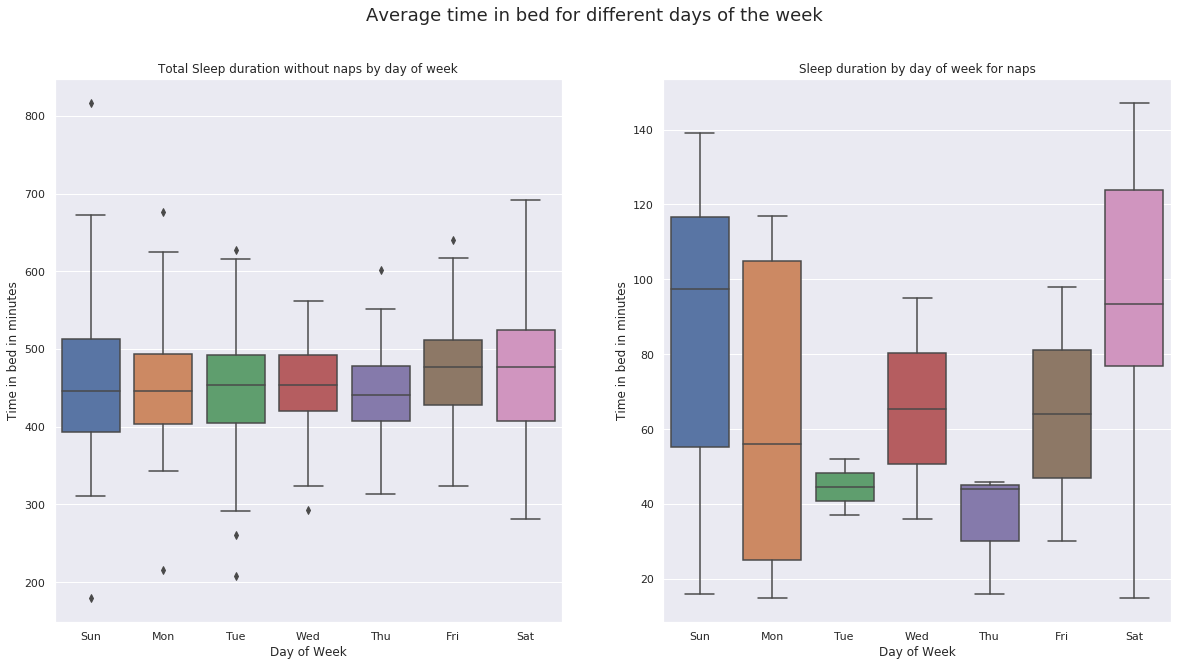

In [140]:
sleepbyday=nonap.groupby([nonap.start_time.dt.date, 'Day']).sum()
sleepbyday=sleepbyday.reset_index(level=1)

day_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

f,axes=plt.subplots(1,2, figsize=(20,10))
f.suptitle("Average time in bed for different days of the week", size=18)

sns.boxplot(x=sleepbyday["Day"], y=sleepbyday["time in bed (min)"], order=day_order, ax=axes[0])
axes[0].set_xlabel("Day of Week")
axes[0].set_ylabel("Time in bed in minutes")
axes[0].set_title("Total Sleep duration without naps by day of week")

sns.boxplot(x=naps["Day"], y=naps["time in bed (min)"], order=day_order, ax=axes[1])
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("Time in bed in minutes")
axes[1].set_title("Sleep duration by day of week for naps")

- From the first plot above, we can see that the average sleeping time without naps (i.e., nighttime sleep) for a given day is somewhat same for all days.

- There is variation of sleep times on Saturday and Sunday nights. All other nights do not have too much variation. - the varaition in sleep times on weekends are probably due to the added naps times - as the person probably makes up for less night sleep on weekends by napping during the day.

- There are a few ouliers which represent days when too much or too little sleep times were observed. It is possible that when when too little sleep is observed, the person ends up napping the following day (similar to the above point of making up sleep on weekends.)

Text(0.5, 1.0, 'Total Sleep duration without naps by day of week')

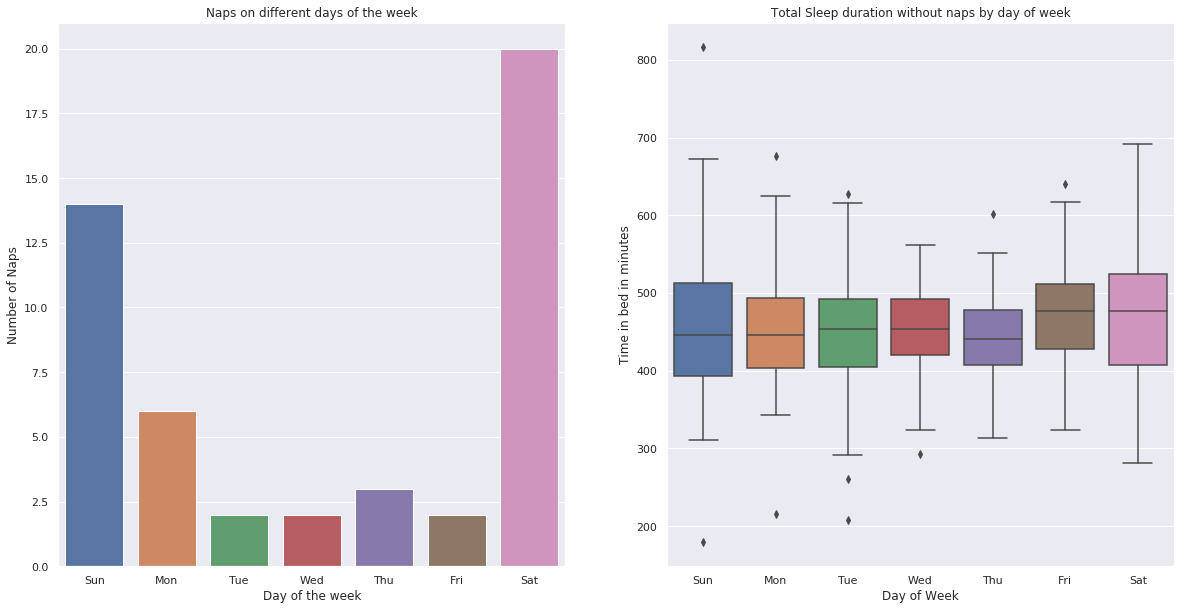

In [119]:
sns.set(style='darkgrid')
plt.subplots(figsize=(20,10))

plt.subplot(121)
#plotting maps
day_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
p=sns.countplot(x=naps["Day"], order=day_order)
p.set_title("Naps on different days of the week")
p.set_xlabel('Day of the week')
p.set_ylabel('Number of Naps')
p.set_ylim = (0,22)

plt.subplot(122)
sleepbyday=nonap.groupby([nonap.start_time.dt.date, 'Day']).sum()
sleepbyday=sleepbyday.reset_index(level=1)
q=sns.boxplot(x=sleepbyday["Day"], y=sleepbyday["time in bed (min)"], order=day_order)
q.set_xlabel("Day of Week")
q.set_ylabel("Time in bed in minutes")
q.set_title("Total Sleep duration without naps by day of week")

### Efficiency & Sleep Quality

#### Efficiency vs Time in Bed

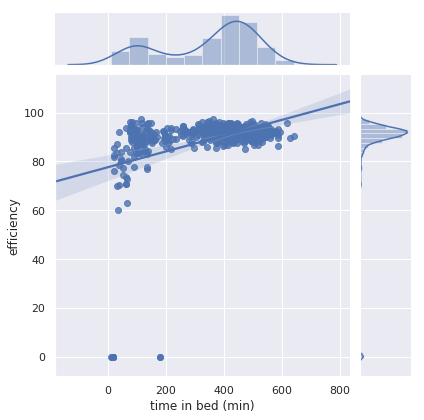

In [142]:
sns.jointplot(x = nsleepdata["time in bed (min)"], y = nsleepdata["efficiency"], kind='reg', height=6)

When we plot the efficiency against the time in bed, we can see that there is a slight positive correlation between efficiency and sleep time - which suggest that higher time in bed gives higher efficiency score. 

#### Efficiency vs. Quality

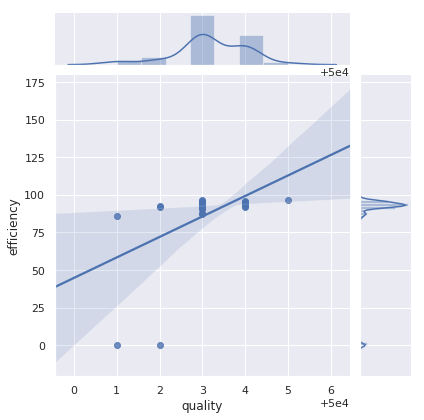

In [145]:
sns.jointplot(x = nsleepdata["quality"], y = nsleepdata["efficiency"], kind='reg', height=6)

From the above we can see that efficiency and quality are correlated.

#### Sleep Quality Invesigation

In [146]:
#getting entries that have sleep quality scores
sleepwithquality=nsleepdata[nsleepdata.quality.notnull()]
sleepwithquality.quality=sleepwithquality.quality.astype(str)

In [147]:
sleepwithquality.groupby('quality').mean()

,time in bed (min),efficiency,has_sleep_data
quality,,,
50001.0,100.000000,42.857145,1.0
50002.0,417.666667,61.350198,1.0
50003.0,419.950000,92.670986,1.0
50004.0,510.833333,94.109285,1.0
50005.0,496.000000,96.572580,1.0


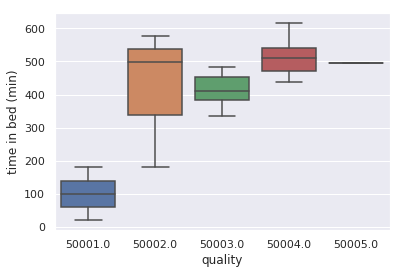

In [148]:
ordr=['50001.0','50002.0','50003.0','50004.0','50005.0']
sns.boxplot(x=sleepwithquality.quality, y=sleepwithquality['time in bed (min)'], data=sleepwithquality, order=ordr)

There is increasing efficiency with increasing quality.

Samsung tracking devices have an option called Record REM Sleep and the sleep codes closely correspond to the values.
The constant field values given by samsung are as follows:
40001 - Stage Awake
40002 - Stage Light
40003 - Stage Deep
40004 - Stage REM

The possible explanation for sleep quality after analyzing the rest of the data, is that the values in the quality column probably correspond to the above mentioned stages. As the value of 40005 (or 50005 in our case) is not mentioed in the samsung docs, we can say that it is closely related to REM sleep stage, as the avergae sleep time and efficiency values are almost the same.

### Plotting efficiency as a coefficient of sleep hours

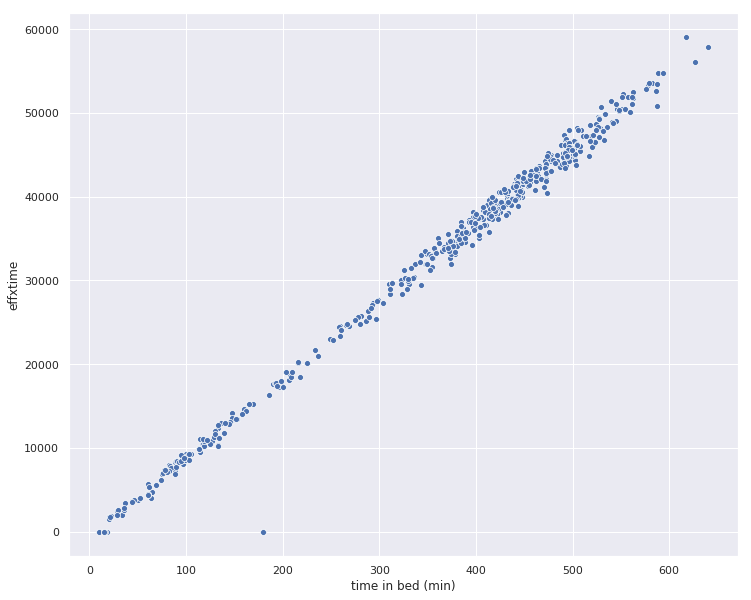

In [149]:
pltsleep=nsleepdata[['time in bed (min)', 'efficiency', 'quality']]
pltsleep['effxtime']=pltsleep['time in bed (min)']*pltsleep.efficiency
f, axes=plt.subplots(1,1,figsize=(12,10))
a=sns.scatterplot(x=pltsleep["time in bed (min)"],y=pltsleep["effxtime"])

We can see that with increasing in the coefficient (product of time in bed and efficiency), we can see higher amount of time in bed. Therefore, a higher efficienfy score means more time in bed and better sleep.

### Sleep Debt

The total sleep lost is called your sleep debt. For example, if a person usually sleep 8 hours a night, but ends up sleeping 3 hours less for a week, he will have a sleep debt of 21 hours for that week.

The normal tendancy for any person is to make up for sleep, if sleep time is lost on previous night. Let's plot the same and check if its true in this person's case.

In [121]:
#though there are some missing dates, most of the dates are consecutive
#we will assume that the dates are consecutive in this case. As nsleepdata is already sorted:
gsleepbydate=nsleepdata.groupby(nsleepdata.start_time.dt.date).sum()

#creating a new column and appending previous day's sleep values
gsleepbydate["timeinbed_previous"]=gsleepbydate.shift(1)["time in bed (min)"]

#getting the difference in sleep time when compared to the previous night
gsleepbydate["difference_sleeptime"]=gsleepbydate["time in bed (min)"]-gsleepbydate["timeinbed_previous"]

/home/abhi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Sleep Debt')

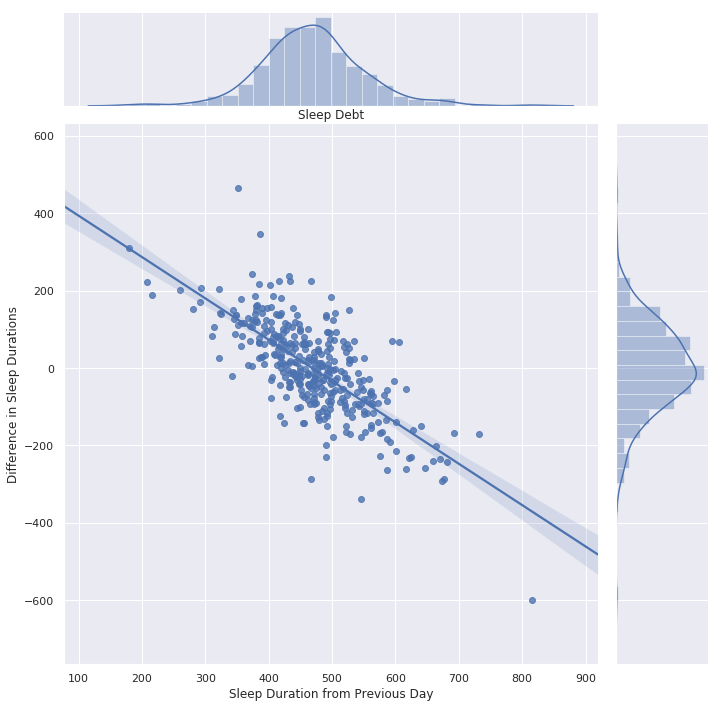

In [122]:
sns.set(style="darkgrid")
sns.jointplot(x = gsleepbydate["timeinbed_previous"], y = gsleepbydate["difference_sleeptime"], kind='reg', height=10)
plt.xlabel("Sleep Duration from Previous Day")
plt.ylabel("Difference in Sleep Durations")
plt.title("Sleep Debt")

There is a negative correlation between difference in sleep duration and sleep from previous night. We can see that when the sleep is lesser than about 450 minutes on a night, it is likely that the individual ends up sleeping extra time on the next day.

## Observations

- The individual sleeps between in the range of 2AM-10AM on most nights and takes more naps on weekends 
- Overall observed sleep range is between 400-500 minutes at night, and remains in the similar range even while travelling
- Efficiency score tends to with more sleep. 
- The individual ends up sleeping for more time when he has slept less the night before due the the phenomena of Sleep debt

As we have data corresponding to different times in all the above datasets, we will compare them with the summary dataset below to arrive to conclusions.

# Summary Dataset

In [123]:
summary_main=pd.read_csv("/home/abhi/Desktop/Lantern/project_2/Health_Data/summary.csv")
summary=summary_main

In [124]:
summary.shape

(949, 19)

In [125]:
summary.describe()

,Unnamed: 0,longest_idle_time,score,goal,calorie,run_time,longest_active_time,day_time,walk_time,active_time,distance,others_time,step_count
count,949.000000,9.490000e+02,949.000000,949.000000,949.000000,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,949.000000,9.490000e+02,949.000000
mean,474.000000,2.652689e+07,28.261328,11.727081,386.631302,9.000208e+04,1.001801e+06,1.505434e+12,4.459645e+06,5.086316e+06,5795.761925,5.366691e+05,7562.605901
std,274.097002,8.897612e+06,62.542856,24.799626,241.186172,2.733164e+05,1.069616e+06,2.368198e+10,2.693326e+06,3.023404e+06,3778.057611,1.277333e+06,4520.969198
min,0.000000,-1.000000e+00,0.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,1.464480e+12,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,237.000000,2.142000e+07,0.000000,-1.000000,205.539980,1.160000e+04,3.000000e+05,1.484957e+12,2.506556e+06,2.891569e+06,3141.370000,0.000000e+00,4132.000000
50%,474.000000,2.568000e+07,0.000000,-1.000000,363.609950,2.899000e+04,6.600000e+05,1.505434e+12,4.269593e+06,4.734281e+06,5628.030000,0.000000e+00,7340.000000
75%,711.000000,3.072000e+07,0.000000,-1.000000,516.850040,6.172600e+04,1.320000e+06,1.525910e+12,6.019383e+06,6.843258e+06,7823.030300,0.000000e+00,10344.000000
max,948.000000,8.094000e+07,320.000000,60.000000,1628.029300,2.520842e+06,8.271533e+06,1.546387e+12,2.013416e+07,2.032845e+07,47439.723000,8.271533e+06,31896.000000


In [126]:
summary.isnull().sum()

Unnamed: 0             0
longest_idle_time      0
score                  0
extra_data             0
goal                   0
calorie                0
run_time               0
deviceuuid             0
update_time            0
longest_active_time    0
day_time               0
walk_time              0
pkg_name               0
active_time            0
distance               0
others_time            0
step_count             0
datauuid               0
create_time            0
dtype: int64

In [127]:
summary.drop(columns=['Unnamed: 0', 'extra_data', 'deviceuuid', 'datauuid'], inplace=True)

In [128]:
#.dt.strftime('%H:%M:%S')
summary["longest_idle_time"]=pd.to_datetime(summary["longest_idle_time"], unit='ms')
summary["longest_active_time"]=pd.to_datetime(summary["longest_active_time"], unit='ms')
summary["day_time"]=pd.to_datetime(summary["day_time"], unit='ms')
summary["walk_time"]=pd.to_datetime(summary["walk_time"], unit='ms')
summary["active_time"]=pd.to_datetime(summary["active_time"], unit='ms')
summary["others_time"]=pd.to_datetime(summary["others_time"], unit='ms')
summary["run_time"]=pd.to_datetime(summary["run_time"], unit='ms')

In [129]:
#Converting times to minutes
summary["longest_idle_time"]=summary["longest_idle_time"].dt.hour*60+summary["longest_idle_time"].dt.minute
summary["longest_active_time"]=summary["longest_active_time"].dt.hour*60+summary["longest_active_time"].dt.minute
summary["walk_time"]=summary["walk_time"].dt.hour*60+summary["walk_time"].dt.minute
summary["active_time"]=summary["active_time"].dt.hour*60+summary["active_time"].dt.minute
summary["others_time"]=summary["others_time"].dt.hour*60+summary["others_time"].dt.minute
summary["run_time"]=summary["run_time"].dt.hour*60+summary["run_time"].dt.minute

In [130]:
summary.rename(index=str, columns={"day_time": "date"}, inplace=True)

In [131]:
summary.columns

Index(['longest_idle_time', 'score', 'goal', 'calorie', 'run_time',
       'update_time', 'longest_active_time', 'date', 'walk_time', 'pkg_name',
       'active_time', 'distance', 'others_time', 'step_count', 'create_time'],
      dtype='object')

In [132]:
summary=summary[['date', 'create_time', 'update_time',  'active_time', 'walk_time', 'run_time', 'distance', 'step_count',  'calorie', 'score', 'goal', 'longest_active_time', 'longest_idle_time', 'others_time', ]]

In [133]:
summary.sort_values("date", axis=0, inplace=True)
summary.reset_index(drop=True, inplace=True)

/home/abhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
summary.head()

,date,create_time,update_time,active_time,walk_time,run_time,distance,step_count,calorie,score,goal,longest_active_time,longest_idle_time,others_time
0,2016-05-29,2016-06-25 14:40:08.675,2016-06-25 14:40:08.675,68,67,1,5300.3810,6876,239.369980,0,-1,7,495,0
1,2016-05-30,2016-06-25 14:40:08.800,2016-06-25 14:40:08.800,38,37,0,2730.5105,3633,124.390010,0,-1,4,466,0
2,2016-05-31,2016-06-25 14:40:08.941,2016-06-25 14:40:08.941,19,19,0,1373.6802,1789,65.420006,0,-1,1,389,0
3,2016-06-01,2016-06-25 14:40:09.046,2016-06-25 14:40:09.046,89,82,7,7621.2686,9314,369.350040,0,-1,15,417,0
4,2016-06-02,2016-06-25 14:40:09.155,2016-06-25 14:40:09.155,36,35,0,2538.4402,3322,117.259995,0,-1,1,427,0


## Plots in summary

From the data above we can see that the values in dataset are values of all other datsets combined. Therefore we will plot out all the summary data against the dates, so that it will be useful for comaprison against the other datasets.

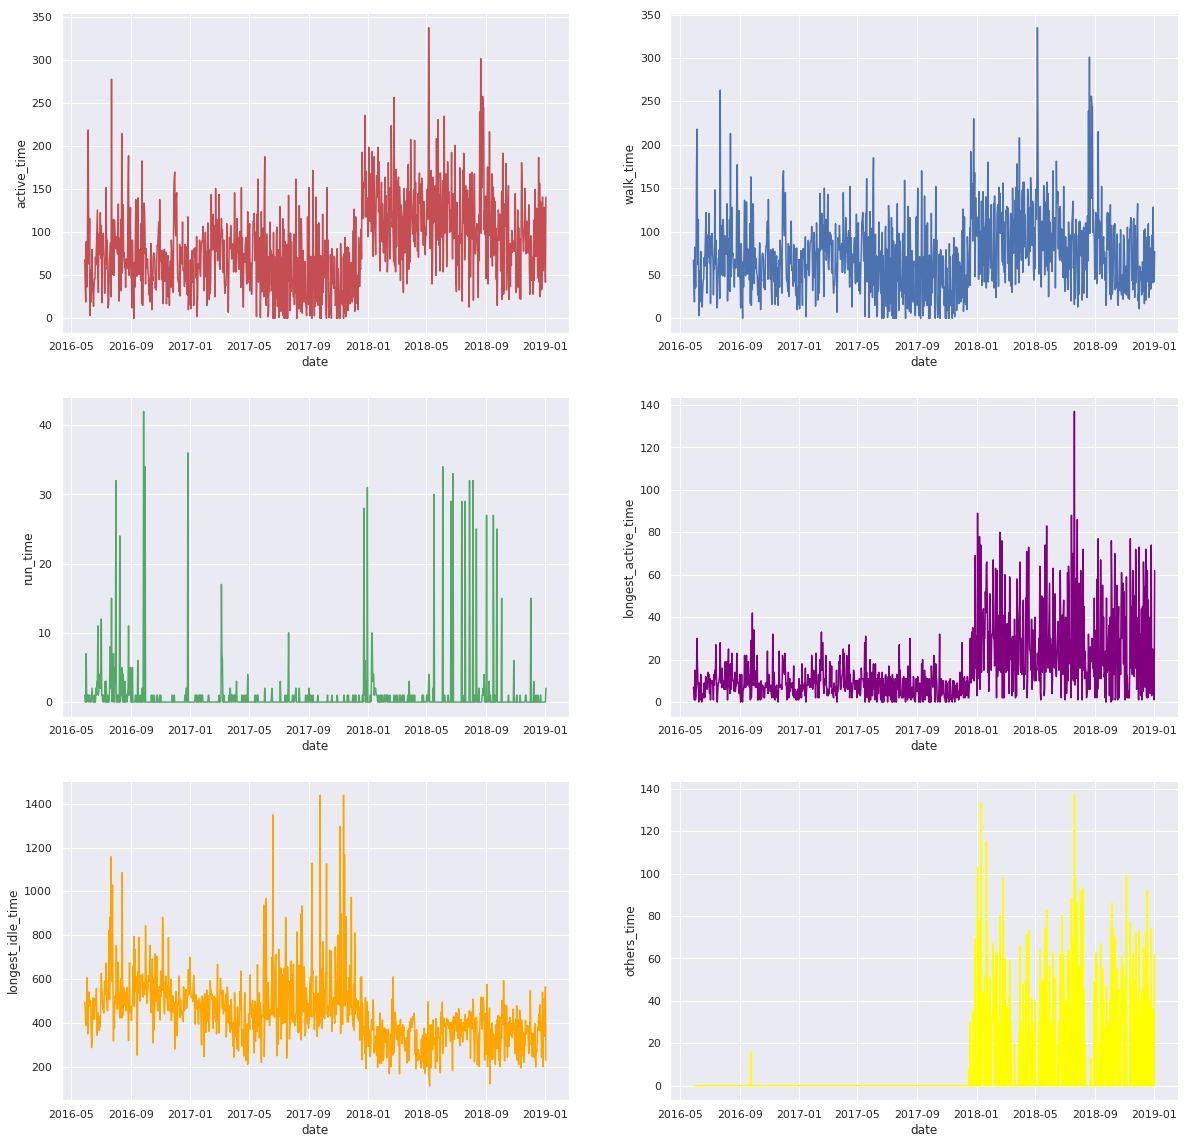

In [135]:
plt.subplots(figsize=(20,20))
plt.subplot(321)
sns.lineplot(x=summary.date, y=summary.active_time, data=summary, color="r")
plt.subplot(322)
sns.lineplot(x=summary.date, y=summary.walk_time, data=summary, color="b")
plt.subplot(323)
sns.lineplot(x=summary.date, y=summary.run_time, data=summary, color="g")
plt.subplot(324)
sns.lineplot(x=summary.date, y=summary.longest_active_time, data=summary, color="Purple")
plt.subplot(325)
sns.lineplot(x=summary.date, y=summary.longest_idle_time, data=summary, color="Orange")
plt.subplot(326)
sns.lineplot(x=summary.date, y=summary.others_time, data=summary, color="yellow")

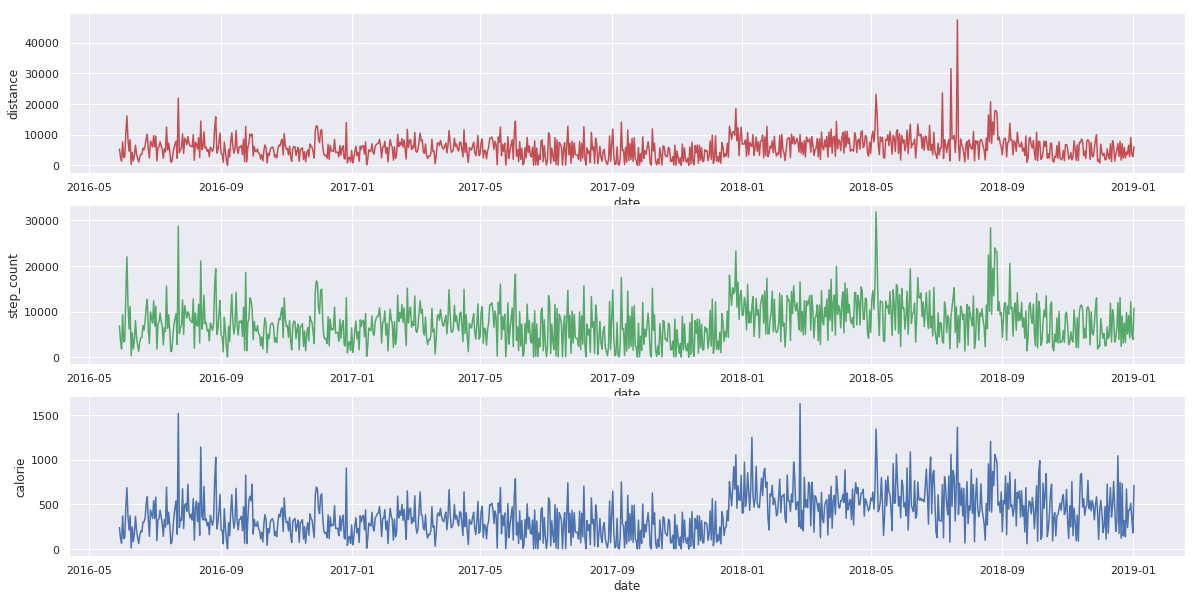

In [136]:
plt.subplots(figsize=(20,10))
plt.subplot(311)
sns.lineplot(x=summary.date, y=summary.distance, data=summary, color="r")
plt.subplot(312)
sns.lineplot(x=summary.date, y=summary.step_count, data=summary, color="g")
plt.subplot(313)
sns.lineplot(x=summary.date, y=summary.calorie, data=summary, color="b")

### Comparison

#### Exercise Dataset Distance    vs.    Summary Dataset Distance

[Text(0.5, 0, 'Date')]

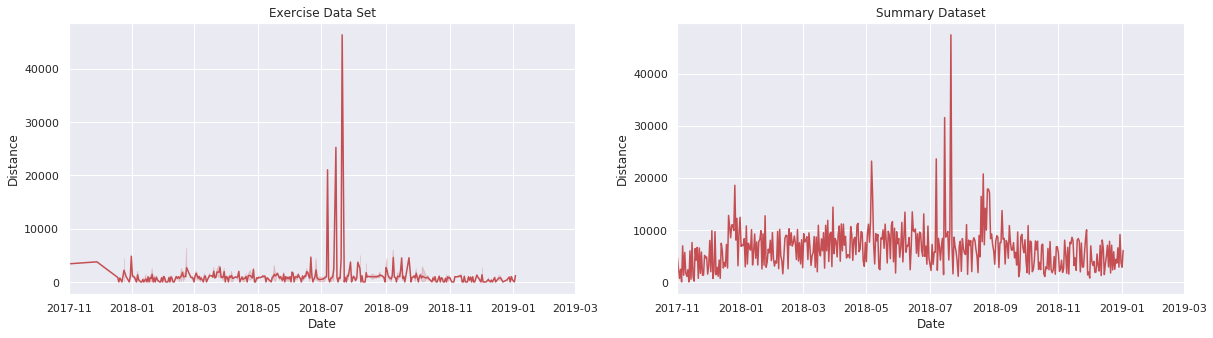

In [250]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
p=sns.lineplot(x=nexercise.start_time.dt.date, y=nexercise.distance, data=nexercise, color="r")
p.set(xlim = ('2017-11-01', '2019-03-02'))
p.set(title=('Exercise Data Set'))
p.set(ylabel='Distance')
p.set(xlabel='Date')
plt.subplot(122)
r=sns.lineplot(x=summary.date, y=summary.distance, data=summary, color="r")
r.set(xlim = ('2017-11-01', '2019-03-02'))
r.set(title=('Summary Dataset'))
r.set(ylabel='Distance')
r.set(xlabel='Date')

#### Stepcount Dataset vs Summary Dataset

[Text(0.5, 0, 'Date')]

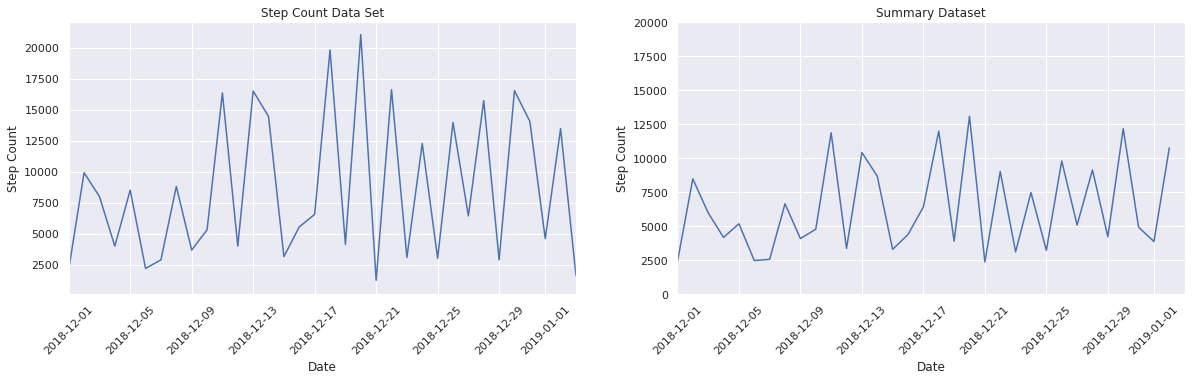

In [249]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
p=sns.lineplot(x=stepbydate.index, y=stepbydate['count'], data=stepbydate, color="b")
p.set(xlim = ('2018-12-01', '2019-01-03'))
plt.xticks(rotation=45)
p.set(title=('Step Count Data Set'))
p.set(ylabel='Step Count')
p.set(xlabel='Date')
plt.subplot(122)
r=sns.lineplot(x=summary.date, y=summary.step_count, data=summary, color="b")
r.set(xlim = ('2018-12-01', '2019-01-03'))
r.set(ylim = (0, 20000))
plt.xticks(rotation=45)
r.set(title=('Summary Dataset'))
r.set(ylabel='Step Count')
r.set(xlabel='Date')

From both the above tables, we can see that the patterns of both the step cound and exercise tables match with summary tables - although there is a differnnce in count of steps (probably as the steps from the exercise have been removed in the summary dataset) and calorie expenditure is more in summary dataset as compared to the exercise (the summary dataset may include calorie expenditure not just from exercise but other values). Since we do not have the complete data ranaging from 2016-2019 in all datasets, it would be difficult to make accurate connections - however, we can see that the trends are somewhat similar - and hence we can say that the summary dataset corresponds to the values in all other datasets up to some extent.

#### Exercise dataset
When we compare our observations from the exercise dataset to the the summary dataset plots - calories burnt, active time, longest idle time and longest active time - we can infact say that there was a huge shift in the individuals lifestyle around 2017 December and the individual exercises more after that point in time.

#### Heartrate Dataset
Again, similar to the above point, we can see that more heart rate records start appearing after Dec 2017 - the active and idle times confirm the fact that the individual has started recording and monitoring more heart rate values from that period onwards after the lifestyle change

#### Floors Climbed Dataset
The floors clmibed dataset is available from Dec 2017 onwards. There isnt too much data in the summary that we can stitch together with this dataset, as data prior to this is unknown- but looking at the active times we can say that the values in the floors climbed dataset do correspond with the summary up to some extent. 

#### Stepcount Dataset
As data was available only for 1 month, Dec 2018 onwards. The UTC zones match and the data corresponds to the months after the person went through a lifestyle change. The stepcount values match that of the summary dataset.

#### Sleep Dataset
There isn't much data in the summary dataset to cross check with the sleep data. However, looking at the above four datasets, we can say that it is possible that the sleeping patterns can match that of the individual we are analysing. 

# Final Observations

From all the above points, we can say that:
- The individual is most likely a young male due to the height / stride length
- He lives in Eastern Standard Time Zone - so most likely located in Canada / America. He sometimes travels to the -7/-8 zone - Pacific Time Zone. His travels include +2000 (Europe / North Africa)  and +4300 (Afghanistan / Iran) zones. As we do not have too much data for 2016 for time zones - we can speculate that this individual lived there earlier and then moved to Eastern Time Zone Area.
- He is fairly active and there was a huge shift in his lifestyle after which he has started exercising on a regular basis
- His sleep times suggest that his daily acvitives (work or study) take place between 12 noon and 8 PM. The wake up times do suggest that he's probably a student or a part-time worker
- He naps a lot during weekends